In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
pd.options.display.float_format = '{:.2f}'.format
import warnings
warnings.filterwarnings('ignore')

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from mpl_toolkits.mplot3d import Axes3D

import plotly.express as px
!pip install -U kaleido
import kaleido

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 4.4 MB/s eta 0:00:00


In [4]:
data = pd.read_csv('/content/sample_data/Country-data.csv')
data.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.20,10.00,7.58,44.90,1610,9.44,56.20,5.82,553
1,Albania,16.60,28.00,6.55,48.60,9930,4.49,76.30,1.65,4090
2,Algeria,27.30,38.40,4.17,31.40,12900,16.10,76.50,2.89,4460
3,Angola,119.00,62.30,2.85,42.90,5900,22.40,60.10,6.16,3530
4,Antigua and Barbuda,10.30,45.50,6.03,58.90,19100,1.44,76.80,2.13,12200


In [6]:
data.shape

(167, 10)

In [8]:
data.columns

Index(['country', 'child_mort', 'exports', 'health', 'imports', 'income',
       'inflation', 'life_expec', 'total_fer', 'gdpp'],
      dtype='object')

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


In [11]:
data.isnull()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...
162,False,False,False,False,False,False,False,False,False,False
163,False,False,False,False,False,False,False,False,False,False
164,False,False,False,False,False,False,False,False,False,False
165,False,False,False,False,False,False,False,False,False,False


In [12]:
data.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.00,167.00,167.00,167.00,167.00,167.00,167.00,167.00,167.00
mean,38.27,41.11,6.82,46.89,17144.69,7.78,70.56,2.95,12964.16
std,40.33,27.41,2.75,24.21,19278.07,10.57,8.89,1.51,18328.70
min,2.60,0.11,1.81,0.07,609.00,-4.21,32.10,1.15,231.00
25%,8.25,23.80,4.92,30.20,3355.00,1.81,65.30,1.79,1330.00
50%,19.30,35.00,6.32,43.30,9960.00,5.39,73.10,2.41,4660.00
75%,62.10,51.35,8.60,58.75,22800.00,10.75,76.80,3.88,14050.00
max,208.00,200.00,17.90,174.00,125000.00,104.00,82.80,7.49,105000.00


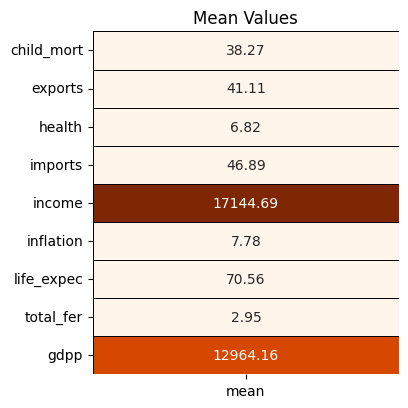

In [13]:
fig,ax = plt.subplots(nrows = 1,ncols = 1,figsize = (5,5))

colors = ['#FF781F','#2D2926']
plt.subplot(1,1,1)
sns.heatmap(data.describe().T[['mean']],cmap = 'Oranges',annot = True,fmt = '.2f',linecolor = 'black',linewidths = 0.4,cbar = False);
plt.title('Mean Values');

fig.tight_layout(pad = 4)

Performing EDA

In [14]:
col = list(data.columns)
col.remove('country')
categorical_features = ['country']
numerical_features = [*col]
print('Categorical Features :',*categorical_features)
print('Numerical Features :',*numerical_features)

Categorical Features : country
Numerical Features : child_mort exports health imports income inflation life_expec total_fer gdpp


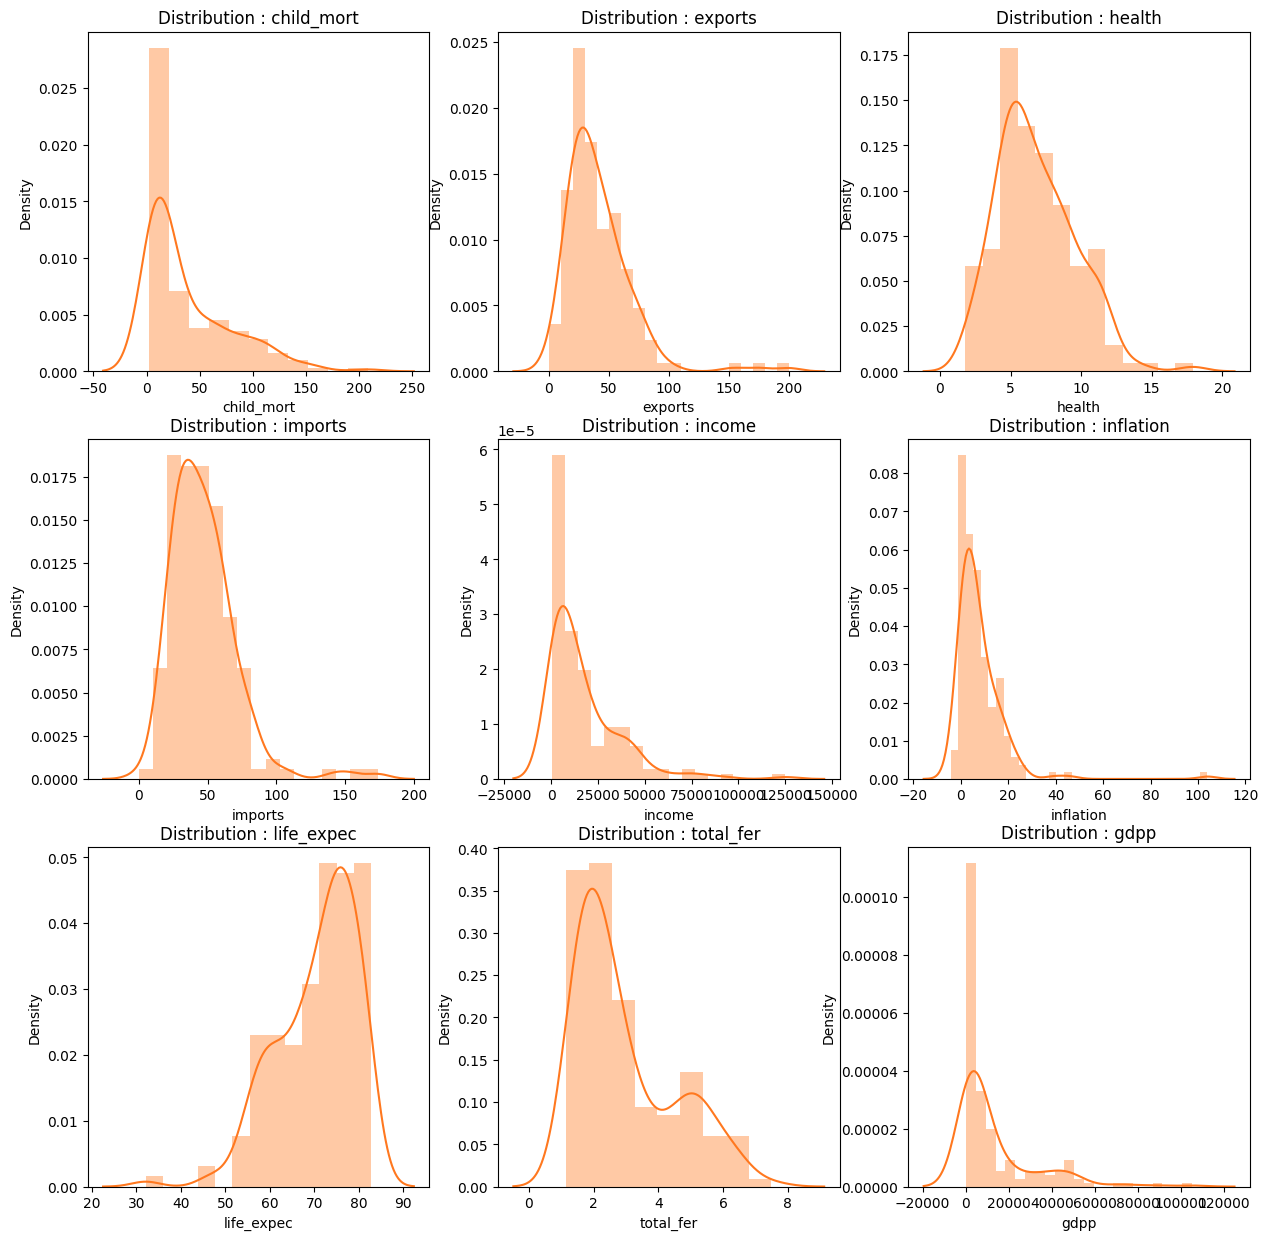

In [15]:
fig, ax = plt.subplots(nrows = 3,ncols = 3,figsize = (15,15))
for i in range(len(numerical_features)):
    plt.subplot(3,3,i+1)
    sns.distplot(data[numerical_features[i]],color = colors[0])
    title = 'Distribution : ' + numerical_features[i]
    plt.title(title)
plt.show()

In [16]:
len(data['country'].unique()) == len(data)

True

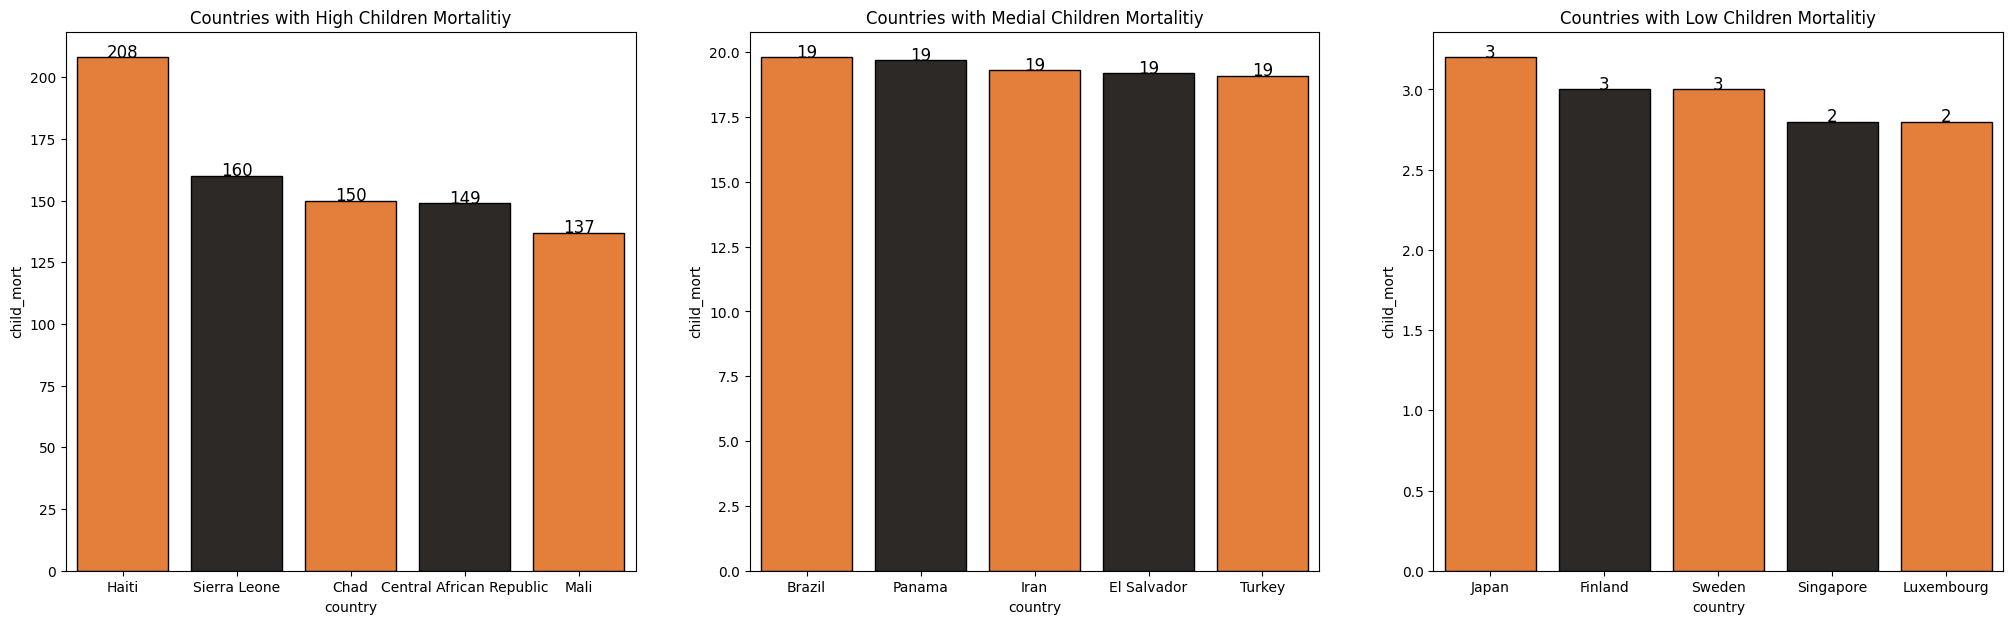

In [18]:
fig = plt.subplots(nrows = 1,ncols = 3,figsize = (25,7))
plt.subplot(1,3,1)
ax = sns.barplot(x = 'country',y = 'child_mort', data = data.sort_values(ascending = False,by = 'child_mort').iloc[:5],palette = colors,edgecolor = 'black');
plt.title('Countries with High Children Mortalitiy')
for rect in ax.patches:
    ax.text(rect.get_x() + rect.get_width()/2, rect.get_height(), int(rect.get_height()),
            horizontalalignment='center', fontsize = 12)

plt.subplot(1,3,2)
ax = sns.barplot(x = 'country',y = 'child_mort', data = data.sort_values(ascending = False,by = 'child_mort').iloc[81:86],palette = colors,edgecolor = 'black');
plt.title('Countries with Medial Children Mortalitiy')
for rect in ax.patches:
    ax.text(rect.get_x() + rect.get_width()/2, rect.get_height(), int(rect.get_height()),
            horizontalalignment='center', fontsize = 12)

plt.subplot(1,3,3)
ax = sns.barplot(x = 'country',y = 'child_mort', data = data.sort_values(ascending = False,by = 'child_mort').iloc[161:166],palette = colors,edgecolor = 'black');
plt.title('Countries with Low Children Mortalitiy')
for rect in ax.patches:
    ax.text(rect.get_x() + rect.get_width()/2, rect.get_height(), int(rect.get_height()),
            horizontalalignment='center', fontsize = 12)
plt.show()


Haiti has the highest children's deaths. African countries have significant positions in this statistic.
At the other extreme of child_mort, countries from Asia and Europe has some solid presence.
exports : It is a very important factor for building the nation's economy. Higher the exports of a nation, stronger the nation's economy and more is the wealth generated by the nation!

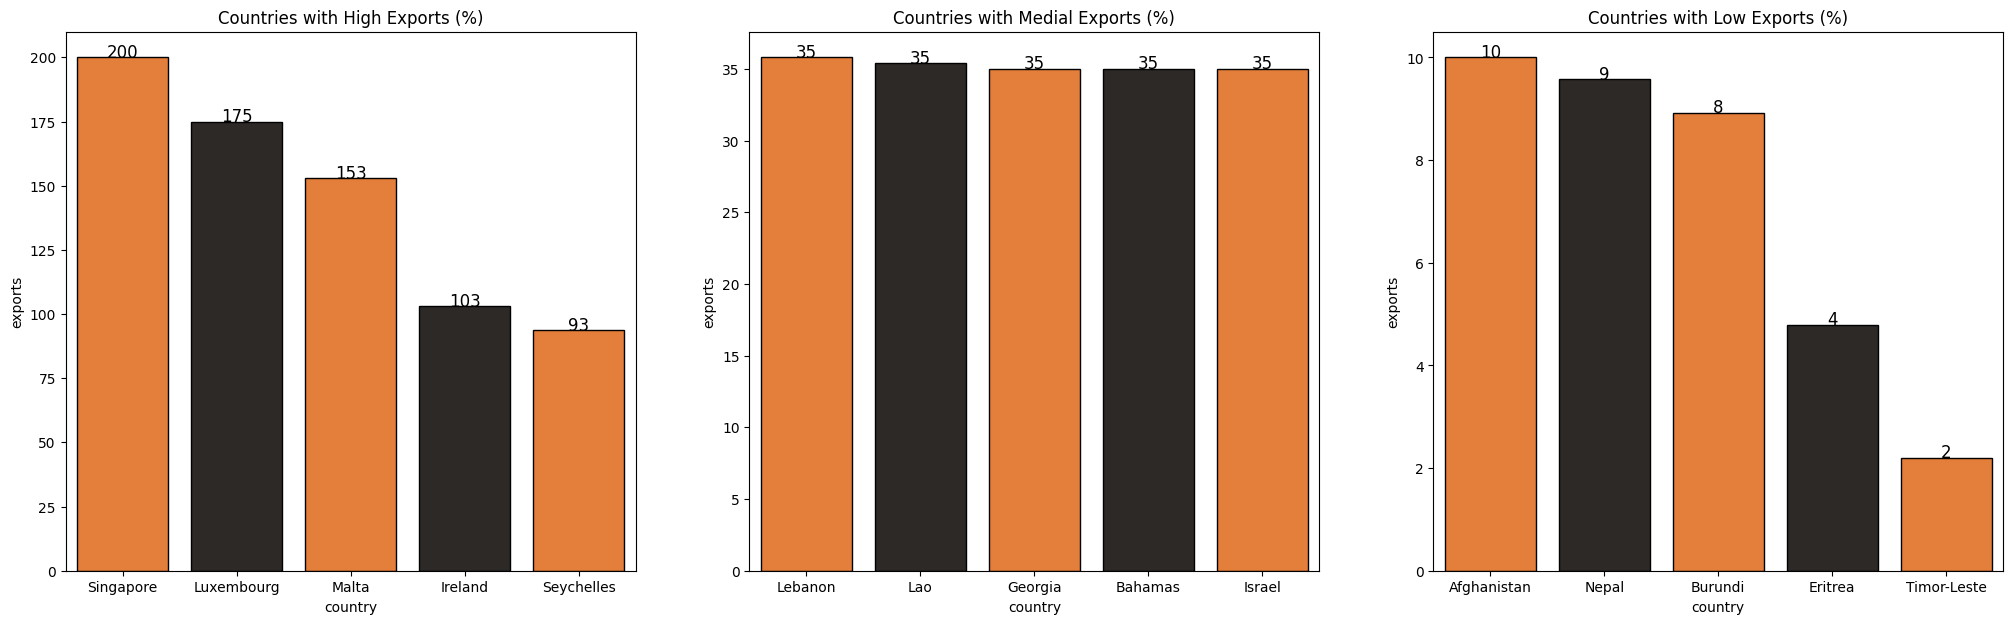

In [19]:
fig = plt.subplots(nrows = 1,ncols = 3,figsize = (25,7))
plt.subplot(1,3,1)
ax = sns.barplot(x = 'country',y = 'exports', data = data.sort_values(ascending = False,by = 'exports').iloc[:5],palette = colors,edgecolor = 'black');
plt.title('Countries with High Exports (%)')
for rect in ax.patches:
    ax.text(rect.get_x() + rect.get_width()/2, rect.get_height(), int(rect.get_height()),
            horizontalalignment='center', fontsize = 12)

plt.subplot(1,3,2)
ax = sns.barplot(x = 'country',y = 'exports', data = data.sort_values(ascending = False,by = 'exports').iloc[81:86],palette = colors,edgecolor = 'black');
plt.title('Countries with Medial Exports (%)')
for rect in ax.patches:
    ax.text(rect.get_x() + rect.get_width()/2, rect.get_height(), int(rect.get_height()),
            horizontalalignment='center', fontsize = 12)

plt.subplot(1,3,3)
ax = sns.barplot(x = 'country',y = 'exports', data = data.sort_values(ascending = False,by = 'exports').iloc[161:166],palette = colors,edgecolor = 'black');
plt.title('Countries with Low Exports (%)')
for rect in ax.patches:
    ax.text(rect.get_x() + rect.get_width()/2, rect.get_height(), int(rect.get_height()),
            horizontalalignment='center', fontsize = 12)
plt.show()


exports of a nation are usually goods and services created domestically but sold to other nations. Goods and services exported depends on factors like the geographical location, natural resources, population size & their preference towards specific skills, etc.
Despite Singapore's population size not being in the top 100, they have the highest number of exports. Luxembourg & Malta have probably followed the same route.
Afghanistan & Nepal are present in the lower end of exports. Geographical locations of these nations have a heavy influence. Countries with lower exports also have small geographical area.

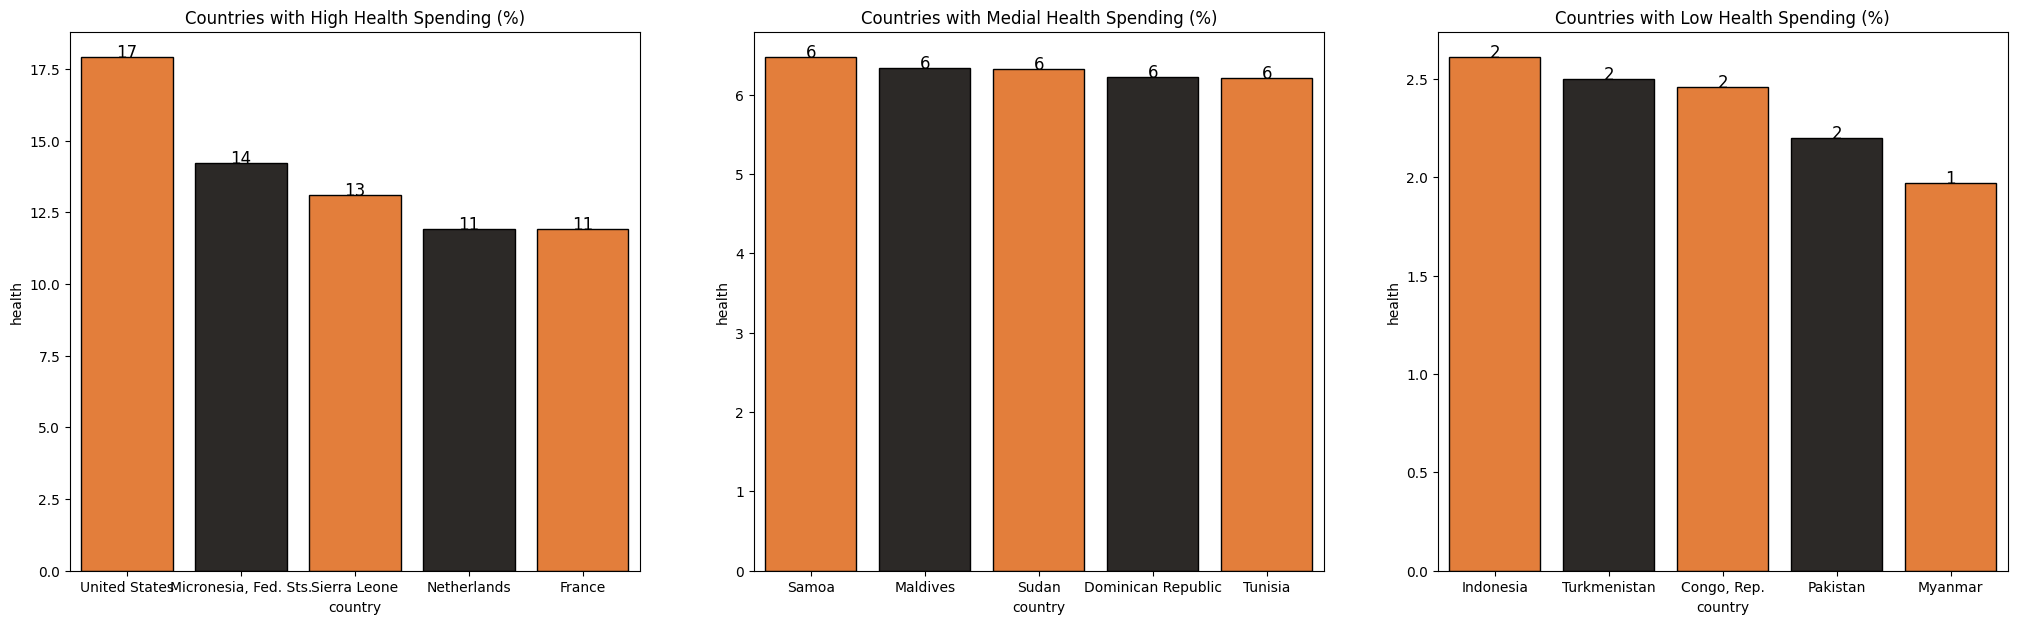

In [20]:
fig = plt.subplots(nrows = 1,ncols = 3,figsize = (25,7))
plt.subplot(1,3,1)
ax = sns.barplot(x = 'country',y = 'health', data = data.sort_values(ascending = False,by = 'health').iloc[:5],palette = colors,edgecolor = 'black');
plt.title('Countries with High Health Spending (%)')
for rect in ax.patches:
    ax.text(rect.get_x() + rect.get_width()/2, rect.get_height(), int(rect.get_height()),
            horizontalalignment='center', fontsize = 12)

plt.subplot(1,3,2)
ax = sns.barplot(x = 'country',y = 'health', data = data.sort_values(ascending = False,by = 'health').iloc[81:86],palette = colors,edgecolor = 'black');
plt.title('Countries with Medial Health Spending (%)')
for rect in ax.patches:
    ax.text(rect.get_x() + rect.get_width()/2, rect.get_height(), int(rect.get_height()),
            horizontalalignment='center', fontsize = 12)

plt.subplot(1,3,3)
ax = sns.barplot(x = 'country',y = 'health', data = data.sort_values(ascending = False,by = 'health').iloc[161:166],palette = colors,edgecolor = 'black');
plt.title('Countries with Low Health Spending (%)')
for rect in ax.patches:
    ax.text(rect.get_x() + rect.get_width()/2, rect.get_height(), int(rect.get_height()),
            horizontalalignment='center', fontsize = 12)
plt.show()

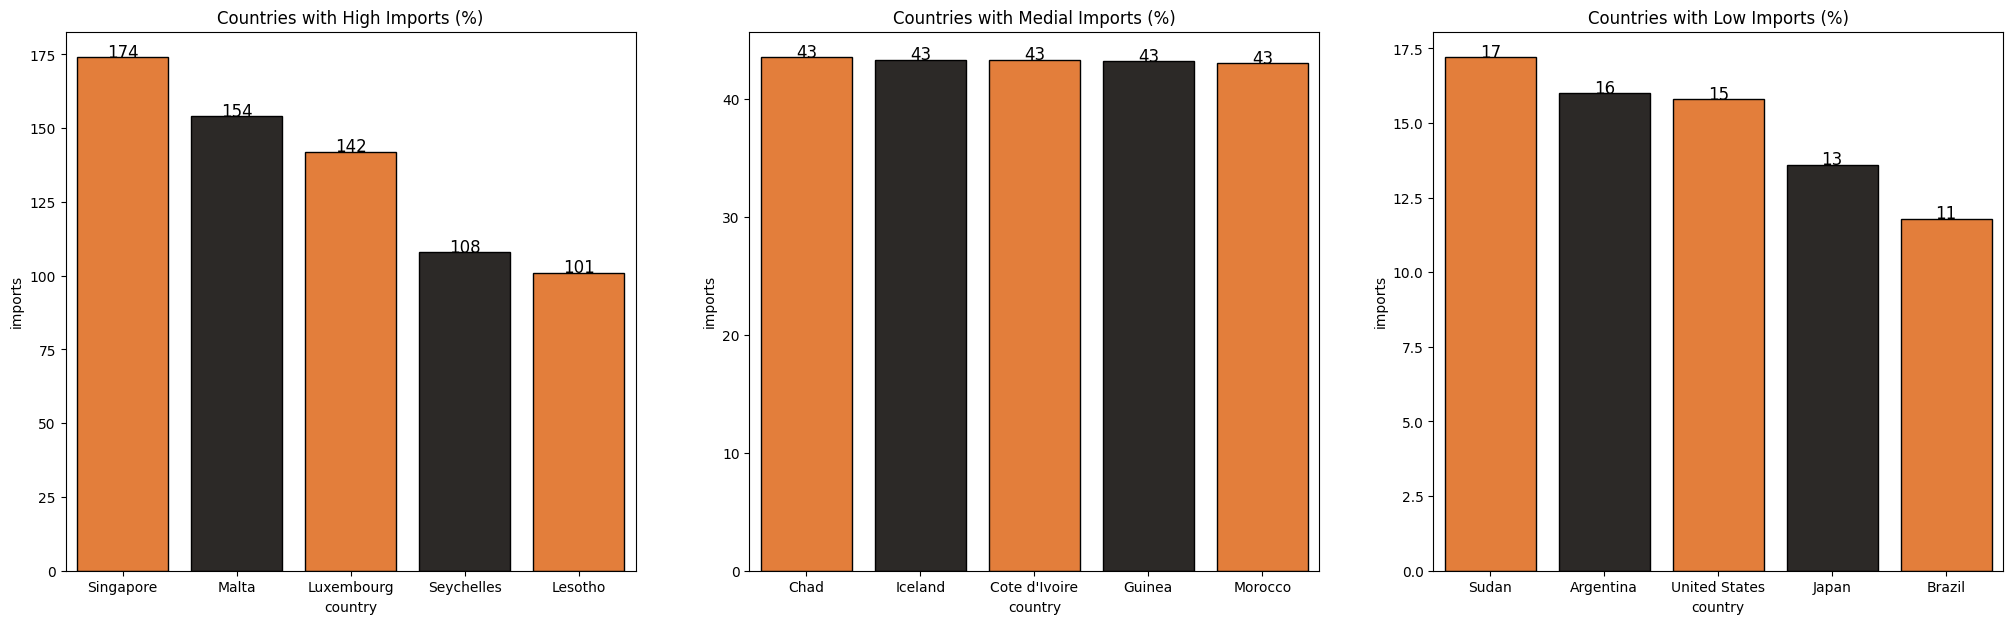

In [22]:
fig = plt.subplots(nrows = 1,ncols = 3,figsize = (25,7))
plt.subplot(1,3,1)
ax = sns.barplot(x = 'country',y = 'imports', data = data.sort_values(ascending = False,by = 'imports').iloc[:5],palette = colors,edgecolor = 'black');
plt.title('Countries with High Imports (%)')
for rect in ax.patches:
    ax.text(rect.get_x() + rect.get_width()/2, rect.get_height(), int(rect.get_height()),
            horizontalalignment='center', fontsize = 12)

plt.subplot(1,3,2)
ax = sns.barplot(x = 'country',y = 'imports', data = data.sort_values(ascending = False,by = 'imports').iloc[81:86],palette = colors,edgecolor = 'black');
plt.title('Countries with Medial Imports (%)')
for rect in ax.patches:
    ax.text(rect.get_x() + rect.get_width()/2, rect.get_height(), int(rect.get_height()),
            horizontalalignment='center', fontsize = 12)

plt.subplot(1,3,3)
ax = sns.barplot(x = 'country',y = 'imports', data = data.sort_values(ascending = False,by = 'imports').iloc[161:166],palette = colors,edgecolor = 'black');
plt.title('Countries with Low Imports (%)')
for rect in ax.patches:
    ax.text(rect.get_x() + rect.get_width()/2, rect.get_height(), int(rect.get_height()),
            horizontalalignment='center', fontsize = 12)
plt.show()

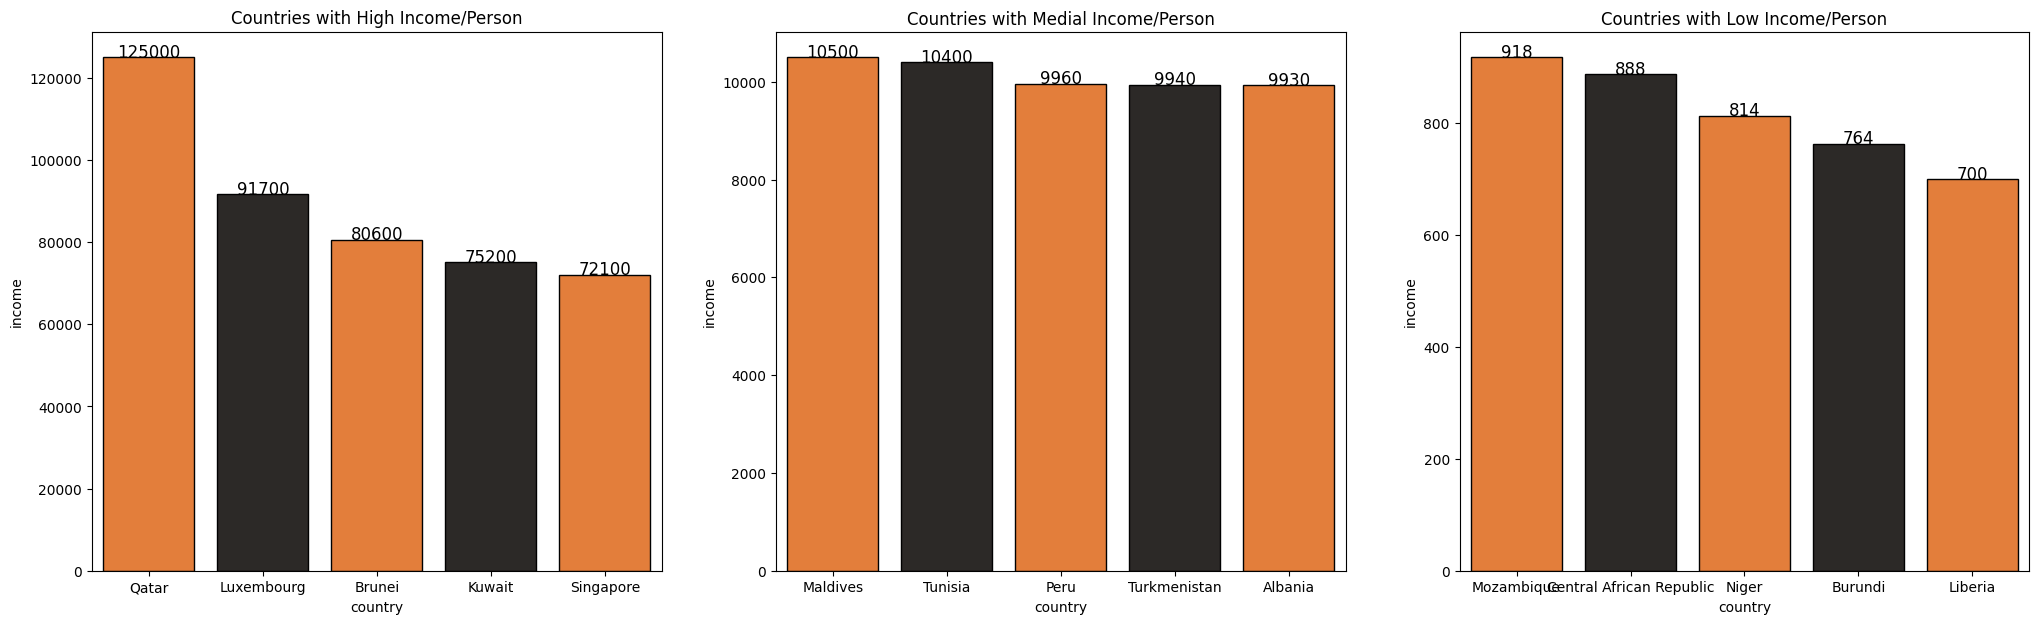

In [24]:
fig = plt.subplots(nrows = 1,ncols = 3,figsize = (25,7))
plt.subplot(1,3,1)
ax = sns.barplot(x = 'country',y = 'income', data = data.sort_values(ascending = False,by = 'income').iloc[:5],palette = colors,edgecolor = 'black');
plt.title('Countries with High Income/Person')
for rect in ax.patches:
    ax.text(rect.get_x() + rect.get_width()/2, rect.get_height(), int(rect.get_height()),
            horizontalalignment='center', fontsize = 12)

plt.subplot(1,3,2)
ax = sns.barplot(x = 'country',y = 'income', data = data.sort_values(ascending = False,by = 'income').iloc[81:86],palette = colors,edgecolor = 'black');
plt.title('Countries with Medial Income/Person')
for rect in ax.patches:
    ax.text(rect.get_x() + rect.get_width()/2, rect.get_height(), int(rect.get_height()),
            horizontalalignment='center', fontsize = 12)

plt.subplot(1,3,3)
ax = sns.barplot(x = 'country',y = 'income', data = data.sort_values(ascending = False,by = 'income').iloc[161:166],palette = colors,edgecolor = 'black');
plt.title('Countries with Low Income/Person')
for rect in ax.patches:
    ax.text(rect.get_x() + rect.get_width()/2, rect.get_height(), int(rect.get_height()),
            horizontalalignment='center', fontsize = 12)
plt.show()

inflation : It dictates the state of the economy, strength of the currency as well as demand for goods & services!

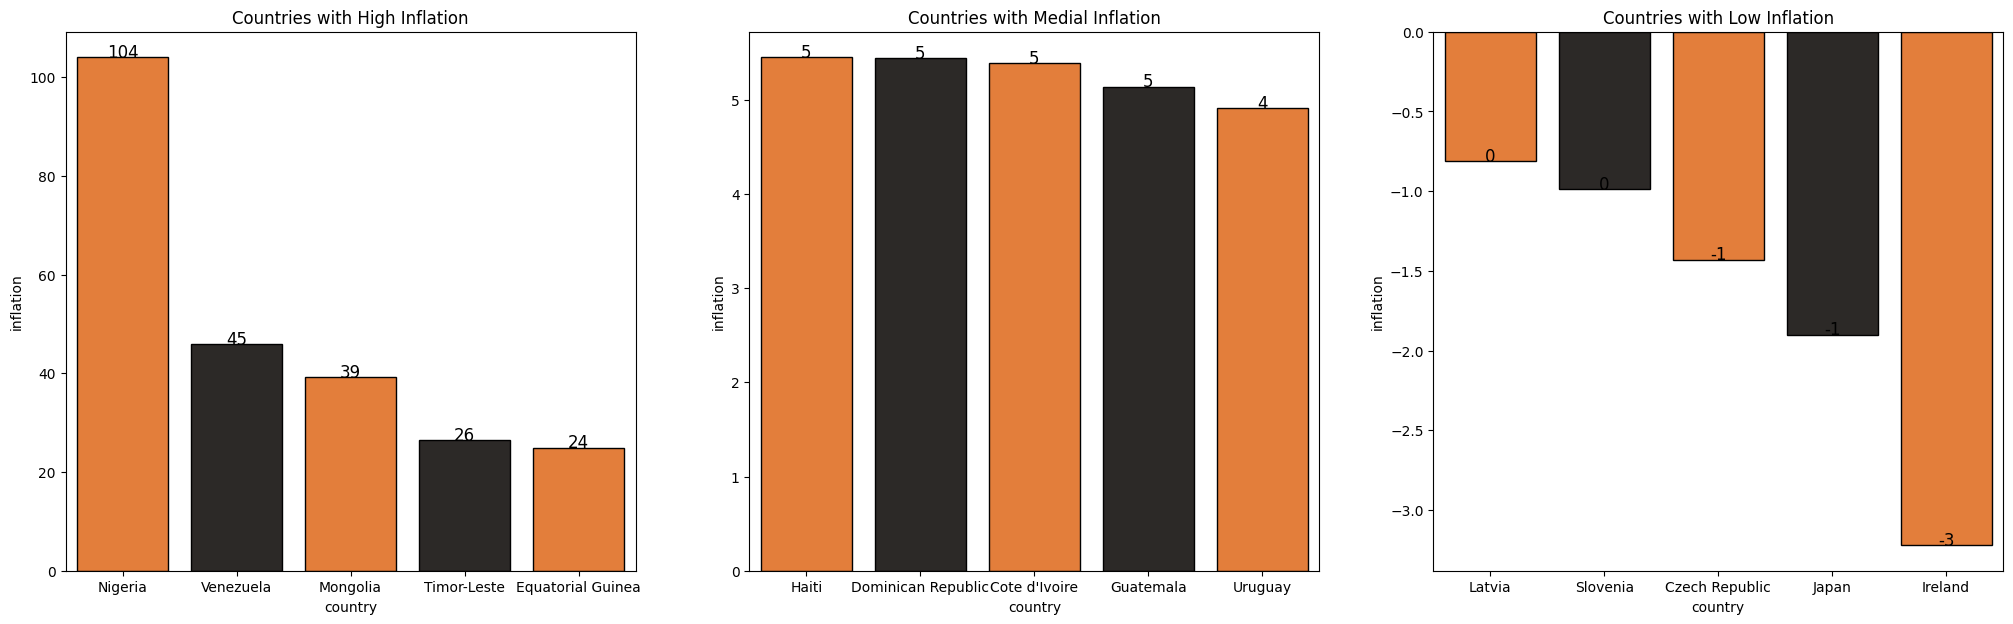

In [25]:
fig = plt.subplots(nrows = 1,ncols = 3,figsize = (25,7))
plt.subplot(1,3,1)
ax = sns.barplot(x = 'country',y = 'inflation', data = data.sort_values(ascending = False,by = 'inflation').iloc[:5],palette = colors,edgecolor = 'black');
plt.title('Countries with High Inflation')
for rect in ax.patches:
    ax.text(rect.get_x() + rect.get_width()/2, rect.get_height(), int(rect.get_height()),
            horizontalalignment='center', fontsize = 12)

plt.subplot(1,3,2)
ax = sns.barplot(x = 'country',y = 'inflation', data = data.sort_values(ascending = False,by = 'inflation').iloc[81:86],palette = colors,edgecolor = 'black');
plt.title('Countries with Medial Inflation')
for rect in ax.patches:
    ax.text(rect.get_x() + rect.get_width()/2, rect.get_height(), int(rect.get_height()),
            horizontalalignment='center', fontsize = 12)

plt.subplot(1,3,3)
ax = sns.barplot(x = 'country',y = 'inflation', data = data.sort_values(ascending = False,by = 'inflation').iloc[161:166],palette = colors,edgecolor = 'black');
plt.title('Countries with Low Inflation')
for rect in ax.patches:
    ax.text(rect.get_x() + rect.get_width()/2, rect.get_height(), int(rect.get_height()),
            horizontalalignment='center', fontsize = 12)
plt.show()

life_expec : Higher life expectancy displays citizens with health attributes physically as well as mentally!

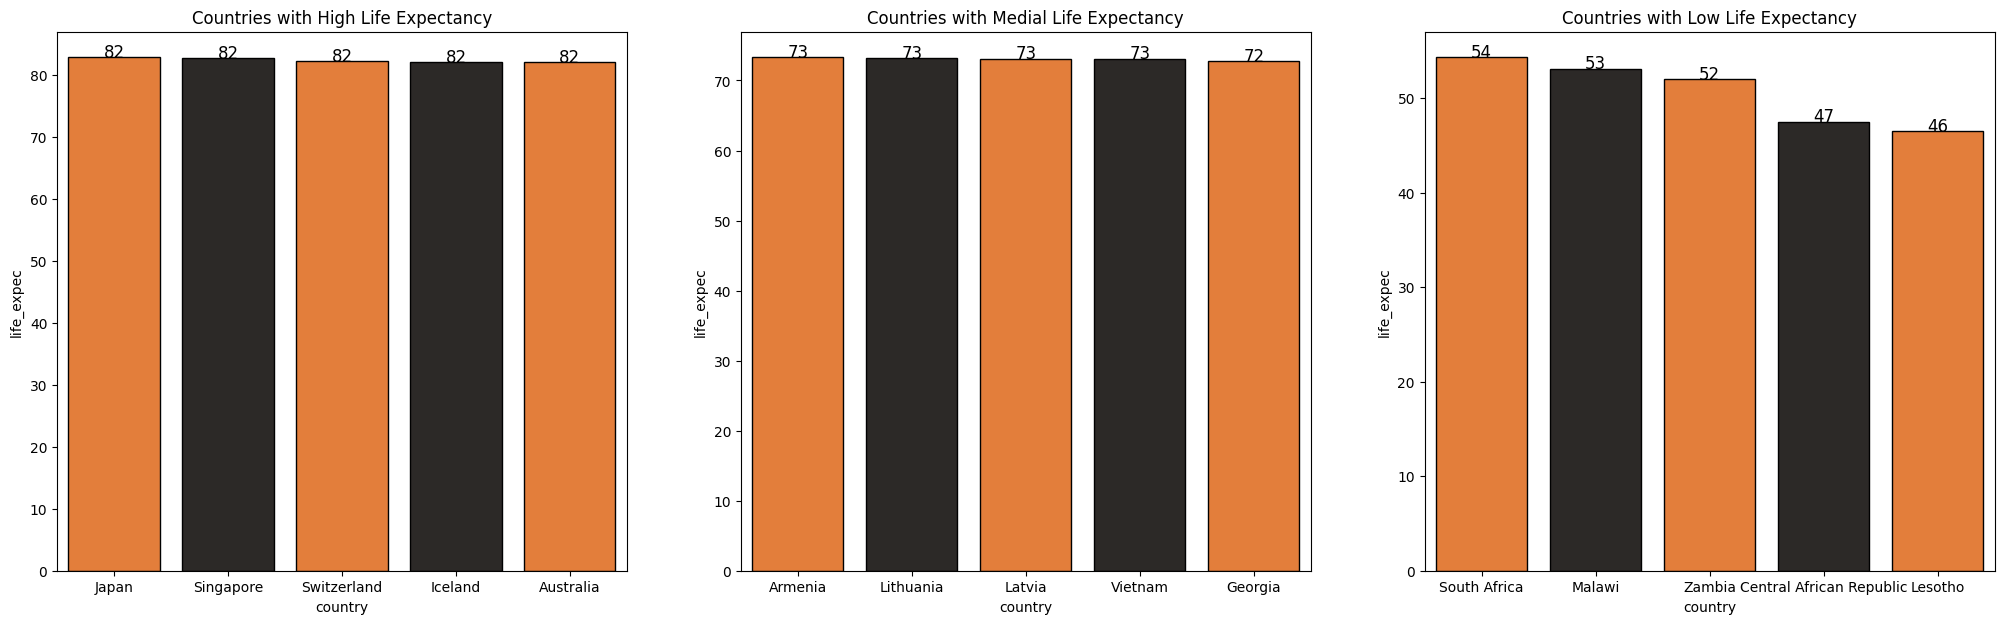

In [26]:
fig = plt.subplots(nrows = 1,ncols = 3,figsize = (25,7))
plt.subplot(1,3,1)
ax = sns.barplot(x = 'country',y = 'life_expec', data = data.sort_values(ascending = False,by = 'life_expec').iloc[:5],palette = colors,edgecolor = 'black');
plt.title('Countries with High Life Expectancy')
for rect in ax.patches:
    ax.text(rect.get_x() + rect.get_width()/2, rect.get_height(), int(rect.get_height()),
            horizontalalignment='center', fontsize = 12)

plt.subplot(1,3,2)
ax = sns.barplot(x = 'country',y = 'life_expec', data = data.sort_values(ascending = False,by = 'life_expec').iloc[81:86],palette = colors,edgecolor = 'black');
plt.title('Countries with Medial Life Expectancy')
for rect in ax.patches:
    ax.text(rect.get_x() + rect.get_width()/2, rect.get_height(), int(rect.get_height()),
            horizontalalignment='center', fontsize = 12)

plt.subplot(1,3,3)
ax = sns.barplot(x = 'country',y = 'life_expec', data = data.sort_values(ascending = False,by = 'life_expec').iloc[161:166],palette = colors,edgecolor = 'black');
plt.title('Countries with Low Life Expectancy')
for rect in ax.patches:
    ax.text(rect.get_x() + rect.get_width()/2, rect.get_height(), int(rect.get_height()),
            horizontalalignment='center', fontsize = 12)
plt.show()

total_fer : Economically backward countries have a high fertility rate!

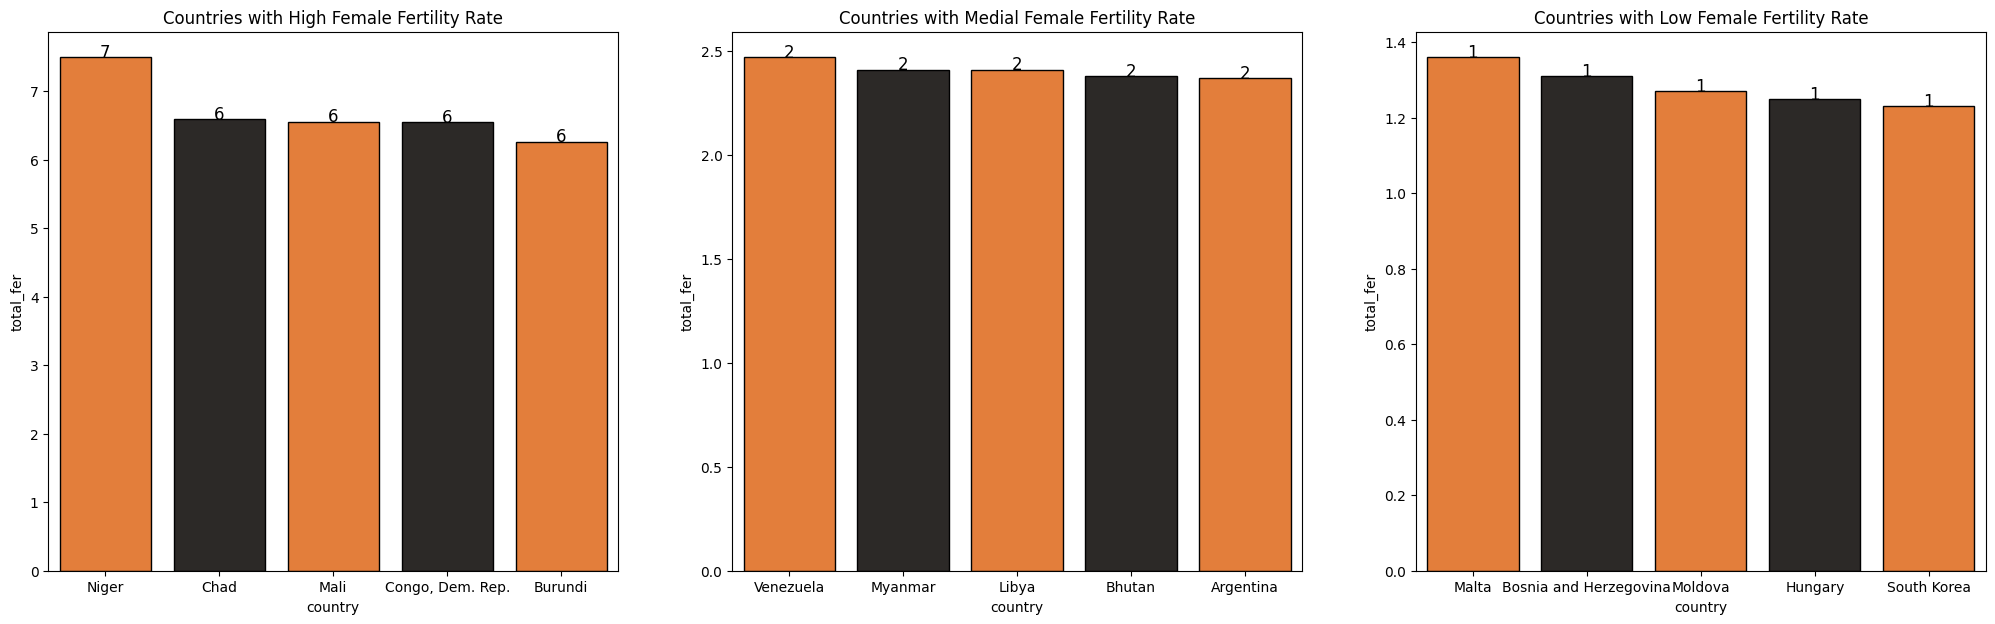

In [27]:
fig = plt.subplots(nrows = 1,ncols = 3,figsize = (25,7))
plt.subplot(1,3,1)
ax = sns.barplot(x = 'country',y = 'total_fer', data = data.sort_values(ascending = False,by = 'total_fer').iloc[:5],palette = colors,edgecolor = 'black');
plt.title('Countries with High Female Fertility Rate')
for rect in ax.patches:
    ax.text(rect.get_x() + rect.get_width()/2, rect.get_height(), int(rect.get_height()),
            horizontalalignment='center', fontsize = 12)

plt.subplot(1,3,2)
ax = sns.barplot(x = 'country',y = 'total_fer', data = data.sort_values(ascending = False,by = 'total_fer').iloc[81:86],palette = colors,edgecolor = 'black');
plt.title('Countries with Medial Female Fertility Rate')
for rect in ax.patches:
    ax.text(rect.get_x() + rect.get_width()/2, rect.get_height(), int(rect.get_height()),
            horizontalalignment='center', fontsize = 12)

plt.subplot(1,3,3)
ax = sns.barplot(x = 'country',y = 'total_fer', data = data.sort_values(ascending = False,by = 'total_fer').iloc[161:166],palette = colors,edgecolor = 'black');
plt.title('Countries with Low Female Fertility Rate')
for rect in ax.patches:
    ax.text(rect.get_x() + rect.get_width()/2, rect.get_height(), int(rect.get_height()),
            horizontalalignment='center', fontsize = 12)
plt.show()

gdpp : It is a feature that provides information about the contribution of a citizen to it's GDP!

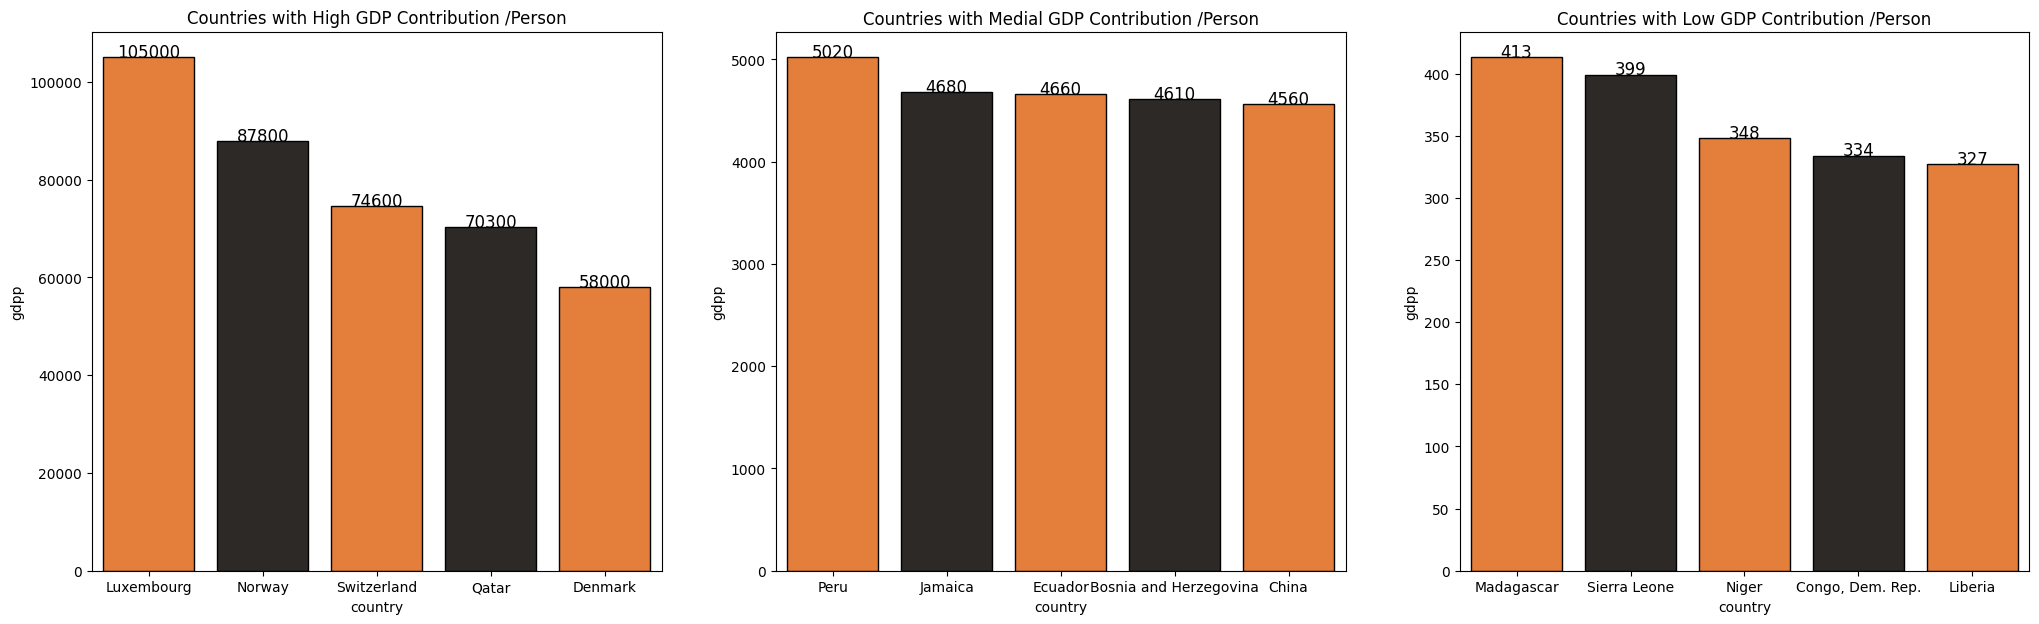

In [28]:
fig = plt.subplots(nrows = 1,ncols = 3,figsize = (25,7))
plt.subplot(1,3,1)
ax = sns.barplot(x = 'country',y = 'gdpp', data = data.sort_values(ascending = False,by = 'gdpp').iloc[:5],palette = colors,edgecolor = 'black');
plt.title('Countries with High GDP Contribution /Person')
for rect in ax.patches:
    ax.text(rect.get_x() + rect.get_width()/2, rect.get_height(), int(rect.get_height()),
            horizontalalignment='center', fontsize = 12)

plt.subplot(1,3,2)
ax = sns.barplot(x = 'country',y = 'gdpp', data = data.sort_values(ascending = False,by = 'gdpp').iloc[81:86],palette = colors,edgecolor = 'black');
plt.title('Countries with Medial GDP Contribution /Person')
for rect in ax.patches:
    ax.text(rect.get_x() + rect.get_width()/2, rect.get_height(), int(rect.get_height()),
            horizontalalignment='center', fontsize = 12)

plt.subplot(1,3,3)
ax = sns.barplot(x = 'country',y = 'gdpp', data = data.sort_values(ascending = False,by = 'gdpp').iloc[161:166],palette = colors,edgecolor = 'black');
plt.title('Countries with Low GDP Contribution /Person')
for rect in ax.patches:
    ax.text(rect.get_x() + rect.get_width()/2, rect.get_height(), int(rect.get_height()),
            horizontalalignment='center', fontsize = 12)
plt.show()

Numerical Features :

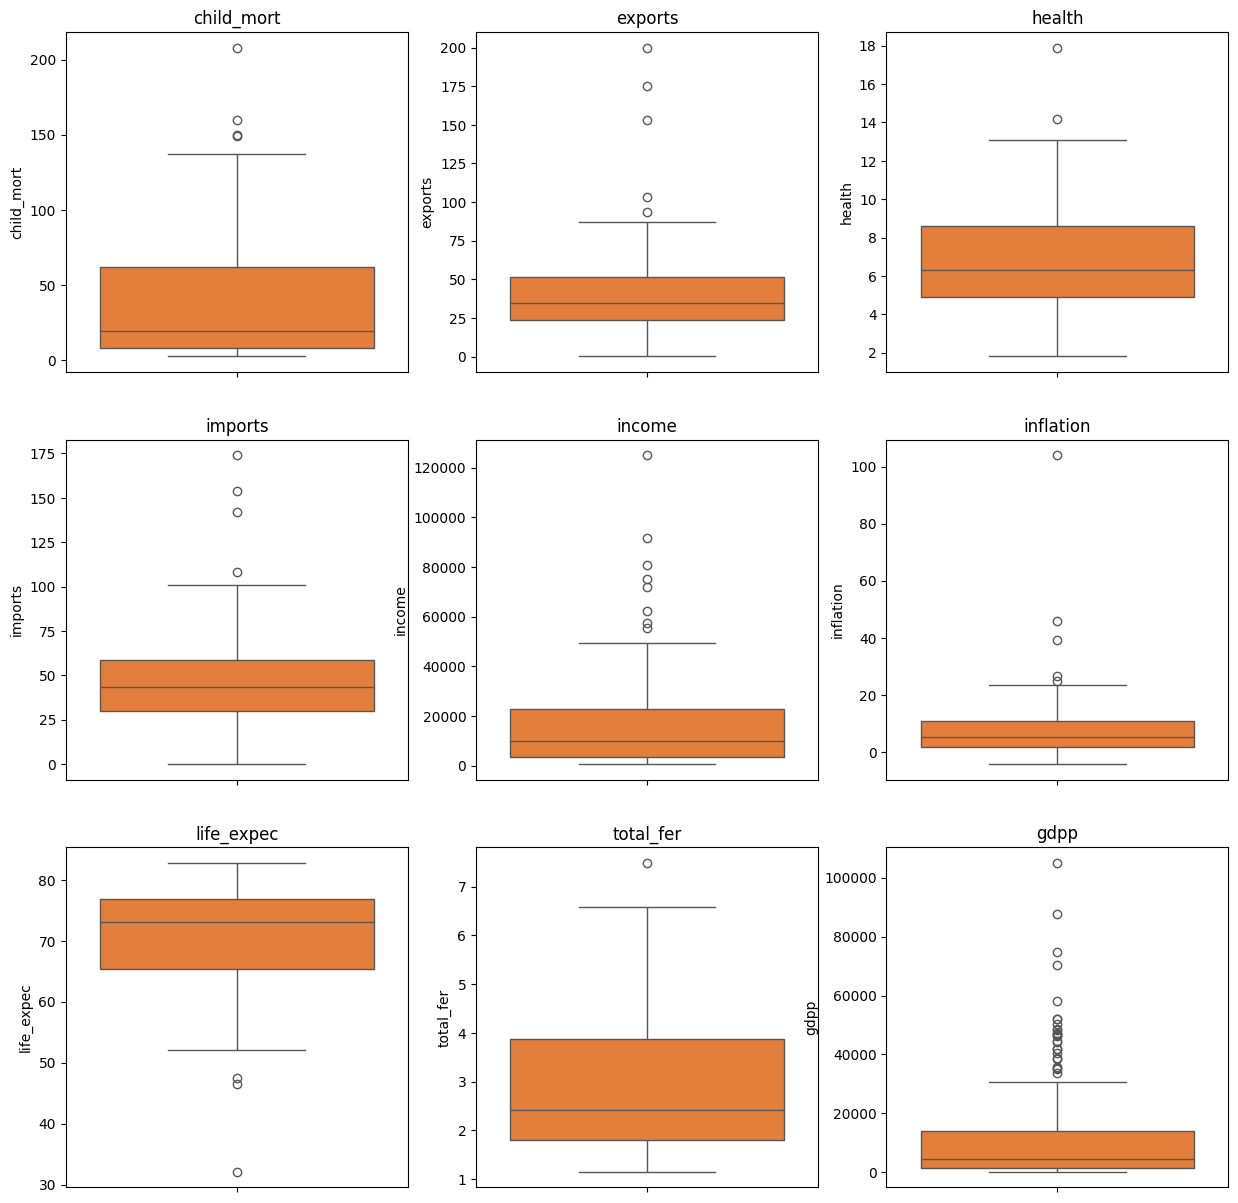

In [29]:
fig  = plt.subplots(nrows = 3,ncols = 3,figsize = (15,15))
for i in range(len(numerical_features)):
    plt.subplot(3,3,i+1)
    ax = sns.boxplot(data[numerical_features[i]],color = colors[0])
    plt.title(numerical_features[i])
plt.show()

Feature engineering


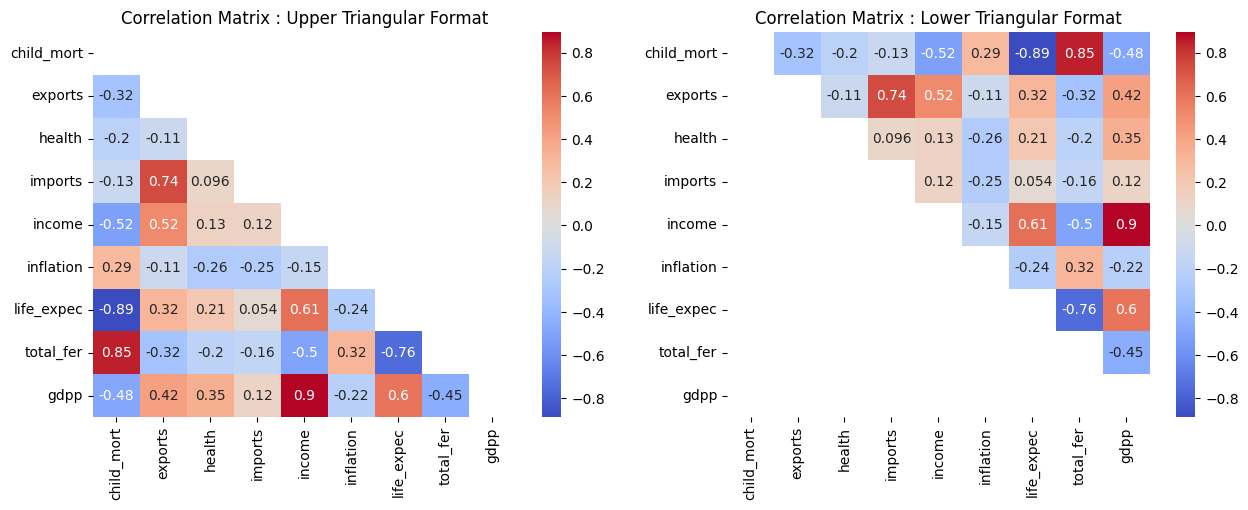

In [31]:
# Assuming 'data' is your DataFrame containing numeric columns for correlation computation
# You may need to select only numeric columns from your DataFrame
numeric_data = data.select_dtypes(include='number')

ut = np.triu(numeric_data.corr())
lt = np.tril(numeric_data.corr())

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))

plt.subplot(1, 2, 1)
sns.heatmap(numeric_data.corr(), cmap='coolwarm', annot=True, cbar=True, mask=ut)
plt.title('Correlation Matrix : Upper Triangular Format')

plt.subplot(1, 2, 2)
sns.heatmap(numeric_data.corr(), cmap='coolwarm', annot=True, cbar=True, mask=lt)
plt.title('Correlation Matrix : Lower Triangular Format')

plt.show()

child_mort clearly increases when income, gdpp & exports decreases. Rise in inflation also leads to high child_mort cases. Economic conditions unfortunately act as an important factor!
Rise in exports clearly increases gdpp, income & imports.
Spending on health has a small rise in life_expec and also decreases the child_mort.
income & gdpp display a very high 0.9 correlation value. From the health perspective, high income has lead to higher life_expec but decreases the total_fer by some significant margin.
As expected high inflation has a negative effect on the financial features. High inflation displays a high total_fer and child_mort. This describes the typical features of a backward nation.
According to the data, higher life_expec displays a low total_fer. Higher gdpp has lead more spending on health.
We can clearly see that some features are essentially from the same category and they have the same reaction to other features of different category.

The 3 categories of the features are :
health : child_mort, health, life_expec, total_fer
trade : imports, exports
finance : income, inflation, gdpp
Hence, we will dissolve these features into these categories and normalize them!

In [32]:
df1 = pd.DataFrame()
df1['Health'] = (data['child_mort'] / data['child_mort'].mean()) + (data['health'] / data['health'].mean()) + (data['life_expec'] / data['life_expec'].mean()) + (data['total_fer'] / data['total_fer'].mean())
df1['Trade'] = (data['imports'] / data['imports'].mean()) + (data['exports'] / data['exports'].mean())
df1['Finance'] = (data['income'] / data['income'].mean()) + (data['inflation'] / data['inflation'].mean()) + (data['gdpp'] / data['gdpp'].mean())
df1.head()

,Health,Trade,Finance
0,6.24,1.20,1.35
1,3.04,1.72,1.47
2,3.39,1.60,3.17
3,6.47,2.43,3.49
4,2.96,2.36,2.24


Data scaling

In [33]:
from sklearn.preprocessing import MinMaxScaler,StandardScaler
mms = MinMaxScaler() # Normalization
ss = StandardScaler() # Standardization

df1['Health'] = mms.fit_transform(df1[['Health']])
df1['Trade'] = mms.fit_transform(df1[['Trade']])
df1['Finance'] = mms.fit_transform(df1[['Finance']])
df1.insert(loc = 0, value = list(data['country']), column = 'Country')
df1.head()

,Country,Health,Trade,Finance
0,Afghanistan,0.63,0.14,0.08
1,Albania,0.13,0.20,0.09
2,Algeria,0.18,0.19,0.21
3,Angola,0.66,0.28,0.24
4,Antigua and Barbuda,0.12,0.28,0.15


Principal Component Analysis (PCA) :
It is a dimension reduction method that is preferrably used for an Unsupervised Learning Problem.

In [35]:
df2 = data.copy(deep = True)

col = list(data.columns)
col.remove('health'); col.remove('country')

df2['health'] = ss.fit_transform(df2[['health']]) # Standardization

for i in col:
    df2[i] = mms.fit_transform(df2[[i]]) # Normalization
df2.drop(columns = 'country',inplace = True)
df2.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,0.43,0.05,0.28,0.26,0.01,0.13,0.48,0.74,0.00
1,0.07,0.14,-0.10,0.28,0.07,0.08,0.87,0.08,0.04
2,0.12,0.19,-0.97,0.18,0.10,0.19,0.88,0.27,0.04
3,0.57,0.31,-1.45,0.25,0.04,0.25,0.55,0.79,0.03
4,0.04,0.23,-0.29,0.34,0.15,0.05,0.88,0.15,0.11


Before passing the data for PCA transformation, normalization & standardization are very important.

In [37]:
from sklearn.decomposition import PCA

pca = PCA()
pca_df2 = pd.DataFrame(pca.fit_transform(df2))
pca.explained_variance_

array([1.01740511, 0.13090418, 0.03450018, 0.02679822, 0.00979752,
       0.00803398, 0.00307055, 0.00239976, 0.00179388])

- These are the variance values of the each feature present in the dataset.

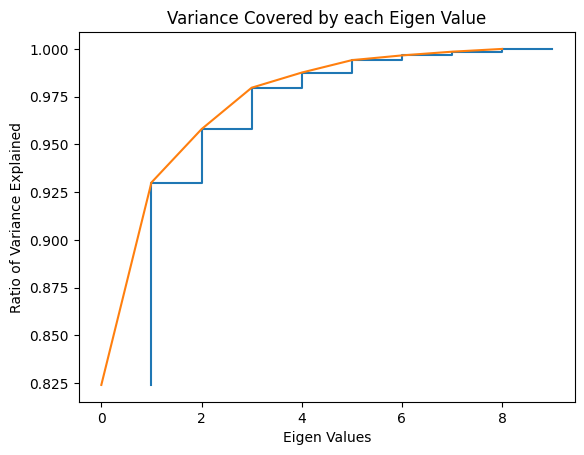

In [38]:
plt.step(list(range(1,10)), np.cumsum(pca.explained_variance_ratio_))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Eigen Values')
plt.ylabel('Ratio of Variance Explained')
plt.title('Variance Covered by each Eigen Value')
plt.show()

In [39]:
pca_df2 = pca_df2.drop(columns = [3,4,5,6,7,8])
pca_df2.head()

,0,1,2
0,0.22,0.64,0.09
1,-0.08,-0.17,-0.21
2,-0.96,-0.13,-0.13
3,-1.51,0.47,0.28
4,-0.26,-0.24,-0.06


Modelling

In [40]:
m1 = df1.drop(columns = ['Country']).values # Feature Combination : Health - Trade - Finance
m2 = pca_df2.values # PCA Data

K-means Clustering

Feature Combination : Health - Trade - Finance

Elbow Method & Silhouette Score Method :

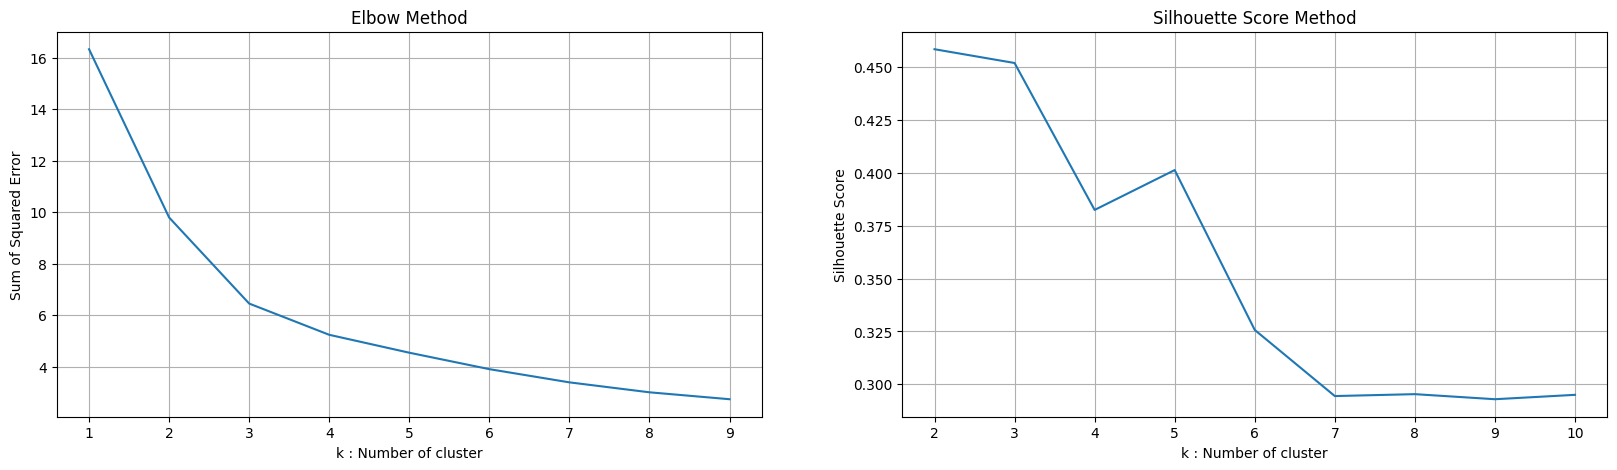

In [42]:
sse = {};sil = [];kmax = 10
fig = plt.subplots(nrows = 1, ncols = 2, figsize = (20,5))

# Elbow Method :
plt.subplot(1,2,1)
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, max_iter=1000).fit(m1)
    sse[k] = kmeans.inertia_ # Inertia: Sum of distances of samples to their closest cluster center
sns.lineplot(x = list(sse.keys()), y = list(sse.values()));
plt.title('Elbow Method')
plt.xlabel("k : Number of cluster")
plt.ylabel("Sum of Squared Error")
plt.grid()

# Silhouette Score Method
plt.subplot(1,2,2)
for k in range(2, kmax + 1):
    kmeans = KMeans(n_clusters = k).fit(m1)
    labels = kmeans.labels_
    sil.append(silhouette_score(m1, labels, metric = 'euclidean'))
sns.lineplot(x = range(2,kmax + 1), y = sil);
plt.title('Silhouette Score Method')
plt.xlabel("k : Number of cluster")
plt.ylabel("Silhouette Score")
plt.grid()

plt.show()


From the results of the above 2 methods, we select :
k : Clusters = 3

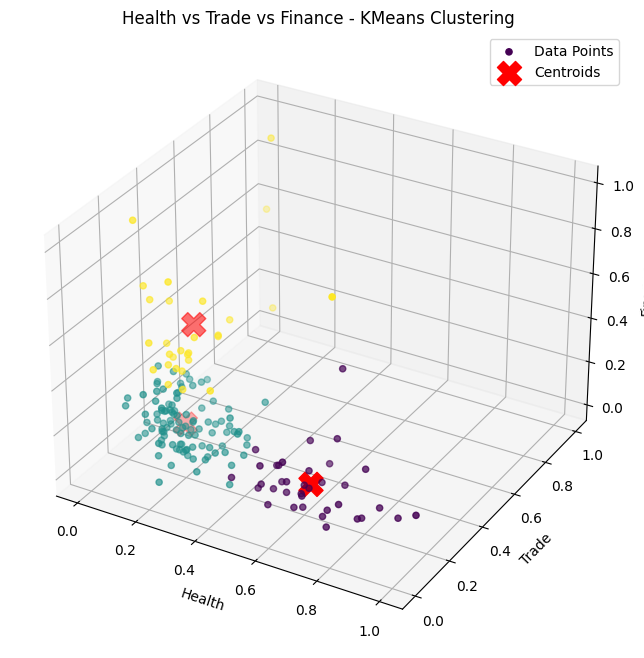

In [44]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np

# Assuming 'df1' is your DataFrame with columns 'Health', 'Trade', 'Finance'
# Assuming 'm1' is your data matrix (if needed)

# Creating the KMeans model
model = KMeans(n_clusters=3, max_iter=1000, random_state=42)
model.fit(m1)  # Assuming m1 is your data matrix

# Get cluster centers
centroids = model.cluster_centers_

# Get labels and assign them to original dataframe
labels = model.labels_
df1['Class'] = labels

# Create 3D scatter plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Data points
x = np.array(df1['Health'])
y = np.array(df1['Trade'])
z = np.array(df1['Finance'])

# Scatter plot of data points
ax.scatter(x, y, z, c=labels, cmap='viridis', label='Data Points')

# Scatter plot of centroids
ax.scatter(centroids[:, 0], centroids[:, 1], centroids[:, 2], marker="X", s=300, c='r', label='Centroids')

# Axis labels and title
ax.set_xlabel('Health')
ax.set_ylabel('Trade')
ax.set_zlabel('Finance')
ax.set_title('Health vs Trade vs Finance - KMeans Clustering')

# Legend
ax.legend()

plt.show()

In [49]:
df1['Class'].loc[df1['Class'] == 0] = 'No Help Needed'
df1['Class'].loc[df1['Class'] == 1] = 'Help Needed'
df1['Class'].loc[df1['Class'] == 2] = 'Might Need Help'

fig = px.choropleth(df1[['Country','Class']],
                    locationmode = 'country names',
                    locations = 'Country',
                    title = 'Needed Help Per Country (World)',
                    color = df1['Class'],
                    color_discrete_map = {'Help Needed':'Red',
                                        'No Help Needed':'Green',
                                        'Might Need Help':'Yellow'}
                   )
fig.update_geos(fitbounds = "locations", visible = True)
fig.update_layout(legend_title_text = 'Labels',legend_title_side = 'top',title_pad_l = 260,title_y = 0.86)
fig.show(engine = 'kaleido')

PCA Data

Elbow Method & Silhouette Score Method :

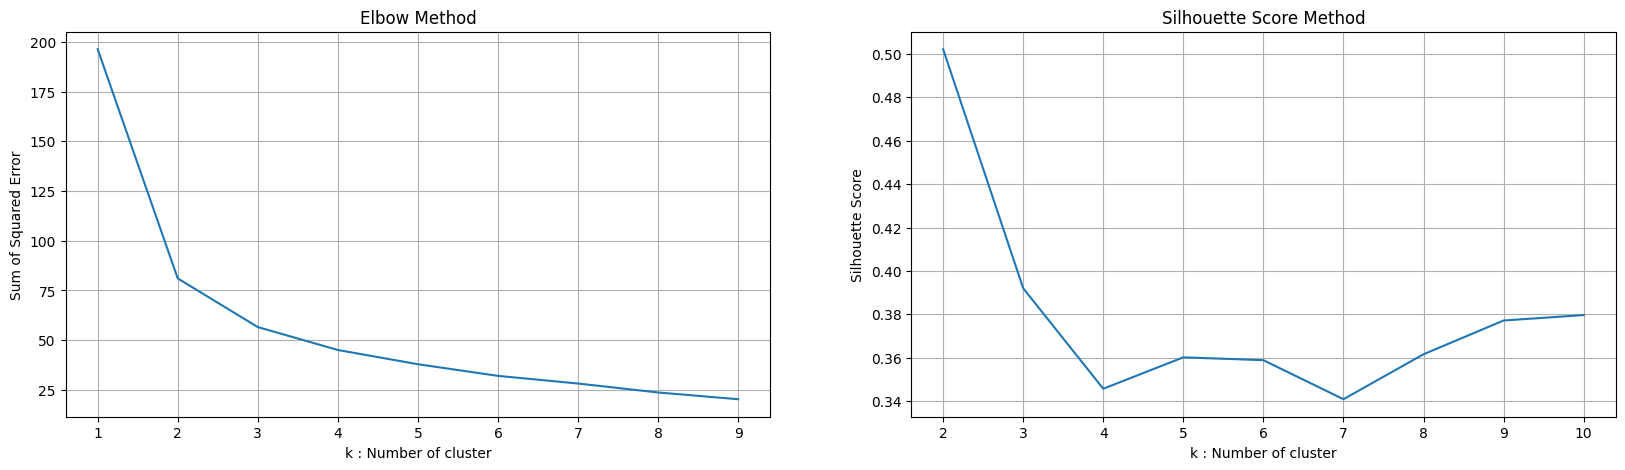

In [50]:
sse = {};sil = [];kmax = 10
fig = plt.subplots(nrows = 1, ncols = 2, figsize = (20,5))

# Elbow Method :
plt.subplot(1,2,1)
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, max_iter=1000).fit(m2)
    sse[k] = kmeans.inertia_ # Inertia: Sum of distances of samples to their closest cluster center
sns.lineplot(x = list(sse.keys()), y = list(sse.values()));
plt.title('Elbow Method')
plt.xlabel("k : Number of cluster")
plt.ylabel("Sum of Squared Error")
plt.grid()

# Silhouette Score Method
plt.subplot(1,2,2)
for k in range(2, kmax + 1):
    kmeans = KMeans(n_clusters = k).fit(m2)
    labels = kmeans.labels_
    sil.append(silhouette_score(m2, labels, metric = 'euclidean'))
sns.lineplot(x = range(2,kmax + 1), y = sil);
plt.title('Silhouette Score Method')
plt.xlabel("k : Number of cluster")
plt.ylabel("Silhouette Score")
plt.grid()

plt.show()

From the results of the above 2 methods, we select :
k : Clusters = 3

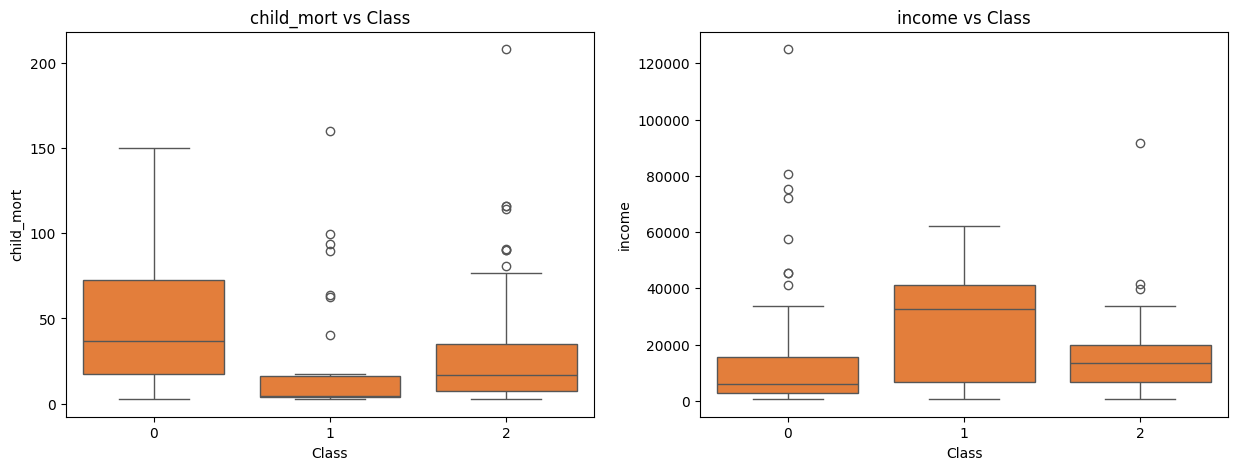

In [52]:
fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (15,5))

plt.subplot(1,2,1)
sns.boxplot(x = 'Class', y = 'child_mort', data  = data, color = '#FF781F');
plt.title('child_mort vs Class')

plt.subplot(1,2,2)
sns.boxplot(x = 'Class', y = 'income', data  = data, color = '#FF781F');
plt.title('income vs Class')

plt.show()

In [53]:
pca_df2.insert(0,column = 'Country', value = data['country'])

pca_df2['Class'].loc[pca_df2['Class'] == 0] = 'Might Need Help'
pca_df2['Class'].loc[pca_df2['Class'] == 1] = 'Help Needed'
pca_df2['Class'].loc[pca_df2['Class'] == 2] = 'No Help Needed'

fig = px.choropleth(pca_df2[['Country','Class']],
                    locationmode = 'country names',
                    locations = 'Country',
                    title = 'Needed Help Per Country (World)',
                    color = pca_df2['Class'],
                    color_discrete_map = {'Help Needed':'Red',
                                          'Might Need Help':'Yellow',
                                          'No Help Needed': 'Green'})
fig.update_geos(fitbounds = "locations", visible = True)
fig.update_layout(legend_title_text = 'Labels',legend_title_side = 'top',title_pad_l = 260,title_y = 0.86)
fig.show(engine = 'kaleido')

Density Based Spatial Clustering of Application with Noise Clustering

In [54]:
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors

Feature Combination : Health - Trade - Finance

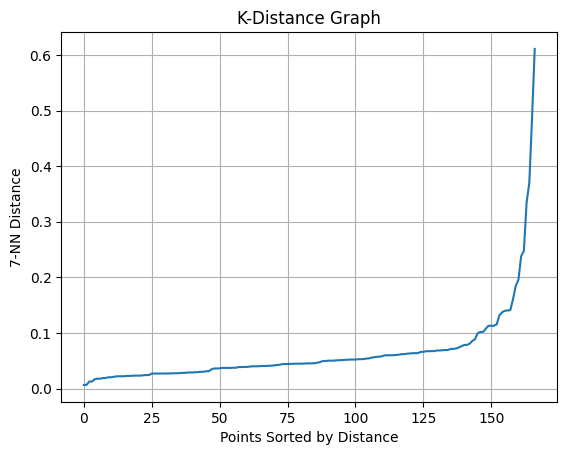

In [55]:
knn = NearestNeighbors(n_neighbors = 7)
model = knn.fit(m1)
distances, indices = knn.kneighbors(m1)
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.grid()
plt.plot(distances);
plt.xlabel('Points Sorted by Distance')
plt.ylabel('7-NN Distance')
plt.title('K-Distance Graph');

In [56]:
db = DBSCAN(eps = 0.080, min_samples = 8).fit(m1)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

# Number of clusters in labels, ignoring noise if present

n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)
print('Number of Clusters : ', n_clusters_)
print('Number of Outliers : ', n_noise_)

data['Class'] = labels; df1['Class'] = labels

Number of Clusters :  3
Number of Outliers :  67


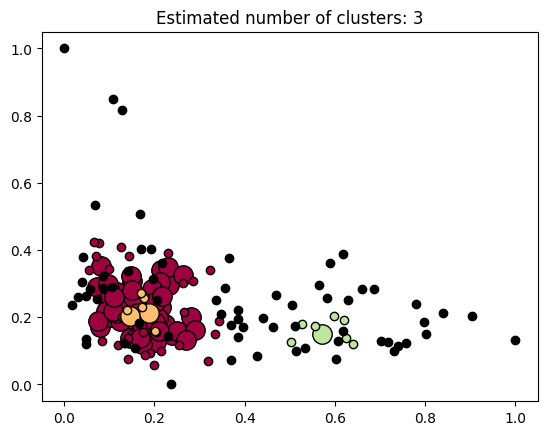

In [57]:
unique_labels = set(labels)
colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]
    class_member_mask = labels == k

    xy = m1[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], "o", markerfacecolor = tuple(col), markeredgecolor = "k", markersize = 14)

    xy = m1[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], "o", markerfacecolor = tuple(col), markeredgecolor = "k", markersize = 6)

plt.title("Estimated number of clusters: %d" % n_clusters_)
plt.show()

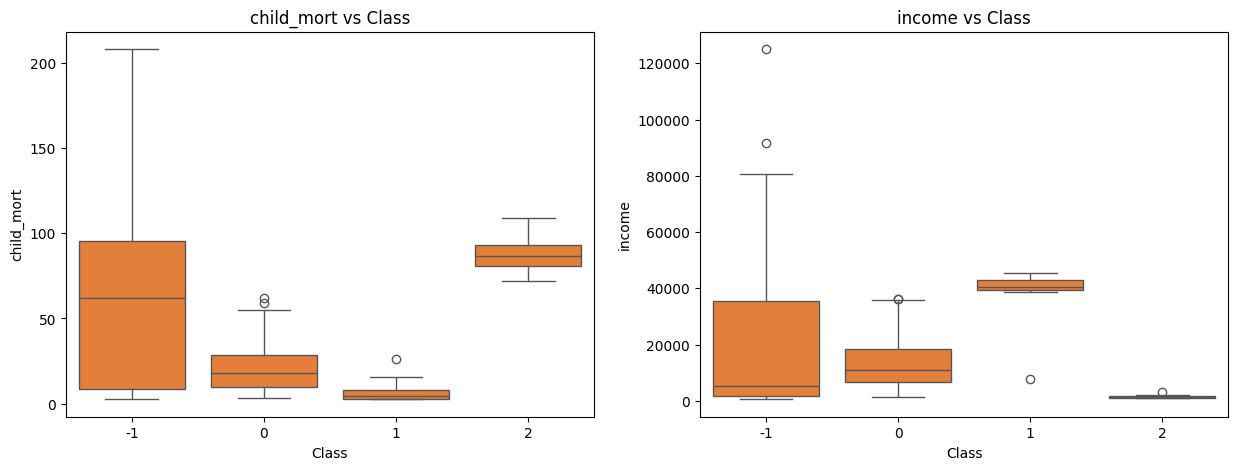

In [58]:
fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (15,5))

plt.subplot(1,2,1)
sns.boxplot(x = 'Class', y = 'child_mort', data  = data, color = '#FF781F');
plt.title('child_mort vs Class')

plt.subplot(1,2,2)
sns.boxplot(x = 'Class', y = 'income', data  = data, color = '#FF781F');
plt.title('income vs Class')

plt.show()

In [59]:
df1['Class'].loc[df1['Class'] == -1] = 'Noise / Outliers'
df1['Class'].loc[df1['Class'] == 0] = 'Might Need Help'
df1['Class'].loc[df1['Class'] == 1] = 'No Help Needed'
df1['Class'].loc[df1['Class'] == 2] ='Help Needed'

fig = px.choropleth(df1[['Country','Class']],
                    locationmode = 'country names',
                    locations = 'Country',
                    title = 'Needed Help Per Country (World)',
                    color = df1['Class'],
                    color_discrete_map={'Noise / Outliers' : 'Black',
                                        'Help Needed':'Red',
                                        'Might Need Help':'Yellow',
                                        'No Help Needed':'Green'})
fig.update_geos(fitbounds = "locations", visible = True)
fig.update_layout(legend_title_text = 'Labels',legend_title_side = 'top',title_pad_l = 260,title_y = 0.86)
fig.show(engine = 'kaleido')

PCA Data

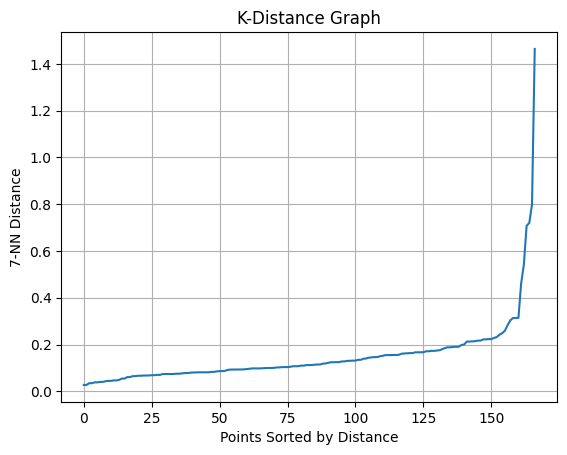

In [60]:
knn = NearestNeighbors(n_neighbors = 7)
model = knn.fit(m2)
distances, indices = knn.kneighbors(m2)
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.xlabel('Points Sorted by Distance')
plt.ylabel('7-NN Distance')
plt.title('K-Distance Graph');
plt.grid()
plt.plot(distances);

In [61]:
db = DBSCAN(eps = 0.2, min_samples = 8).fit(m2)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

# Number of clusters in labels, ignoring noise if present
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)
print('Number of Clusters : ', n_clusters_)
print('Number of Outliers : ', n_noise_)

data['Class'] = labels; pca_df2['Class'] = labels

Number of Clusters :  3
Number of Outliers :  94


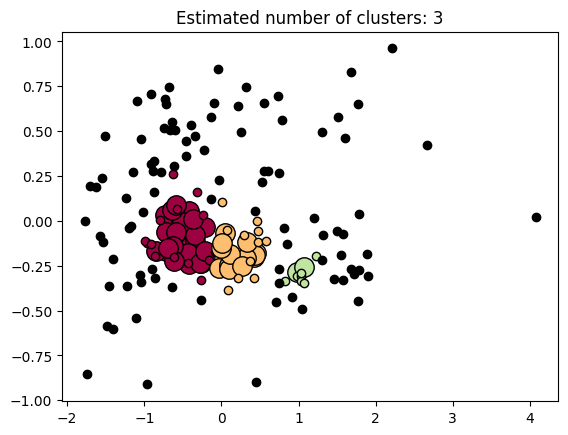

In [62]:
unique_labels = set(labels)
colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]
    class_member_mask = labels == k

    xy = m2[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], "o", markerfacecolor = tuple(col), markeredgecolor = "k", markersize = 14)

    xy = m2[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], "o", markerfacecolor = tuple(col), markeredgecolor = "k", markersize = 6)

plt.title("Estimated number of clusters: %d" % n_clusters_)
plt.show()

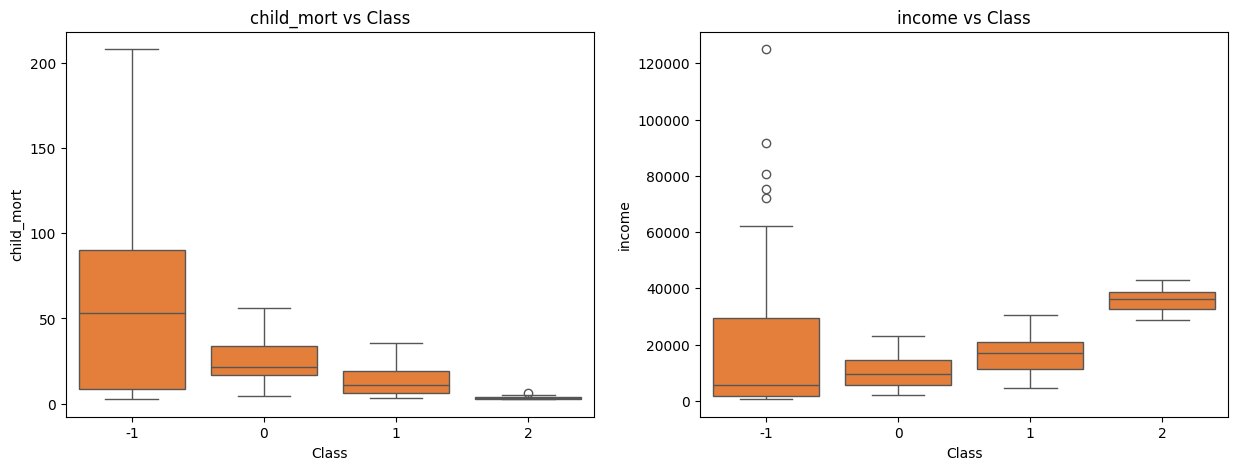

In [63]:
fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (15,5))

plt.subplot(1,2,1)
sns.boxplot(x = 'Class', y = 'child_mort', data  = data, color = '#FF781F');
plt.title('child_mort vs Class')

plt.subplot(1,2,2)
sns.boxplot(x = 'Class', y = 'income', data  = data, color = '#FF781F');
plt.title('income vs Class')

plt.show()

In [64]:
pca_df2['Class'].loc[pca_df2['Class'] == -1] = 'Noise / Outliers'
pca_df2['Class'].loc[pca_df2['Class'] == 0] = 'Help Needed'
pca_df2['Class'].loc[pca_df2['Class'] == 1] = 'Might Need Help'
pca_df2['Class'].loc[pca_df2['Class'] == 2] ='No Help Needed'

fig = px.choropleth(pca_df2[['Country','Class']],
                    locationmode = 'country names',
                    locations = 'Country',
                    title = 'Needed Help Per Country (World)',
                    color_discrete_sequence=["orange", "red", "green",'black'],
                    color = pca_df2['Class'],
                    color_discrete_map={'Noise / Outliers' : 'Black',
                                        'Help Needed':'Red',
                                        'Might Need Help':'Yellow',
                                        'No Help Needed':'Green'})
fig.update_geos(fitbounds = "locations", visible = True)
fig.update_layout(legend_title_text = 'Labels',legend_title_side = 'top',title_pad_l = 260,title_y = 0.86)
fig.show(engine = 'kaleido')

Hierarchical Clustering

In [65]:
from scipy.cluster.hierarchy import dendrogram, linkage

Feature Combination : Health - Trade - Finance

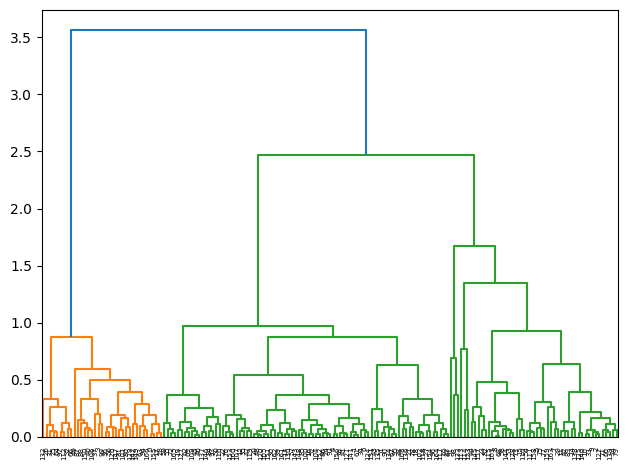

In [66]:
linkage_data = linkage(m1, method = 'ward', metric = 'euclidean')
dendrogram(linkage_data)
plt.tight_layout()
plt.show()

- In this case, we need to divide the countries into 3 categories. That is why we will select a 3 clusters directly. Dendrogram analysis for this dataset is kind of redundant.
- Here, we can see that 1 **blue line** alongwith 2 **red lines** are the penultimate clusters that before connecting together.
- It has 3 branches, thus indicating the **3 clusters** that it creates before merging into 1!

In [67]:
from sklearn.cluster import AgglomerativeClustering
hierarchical_cluster = AgglomerativeClustering(n_clusters = 3, affinity = 'euclidean', linkage = 'ward')
labels = hierarchical_cluster.fit(m1)

pred_agc = pd.Series(hierarchical_cluster.labels_)
data['Class'] = pred_agc; df1['Class'] = pred_agc

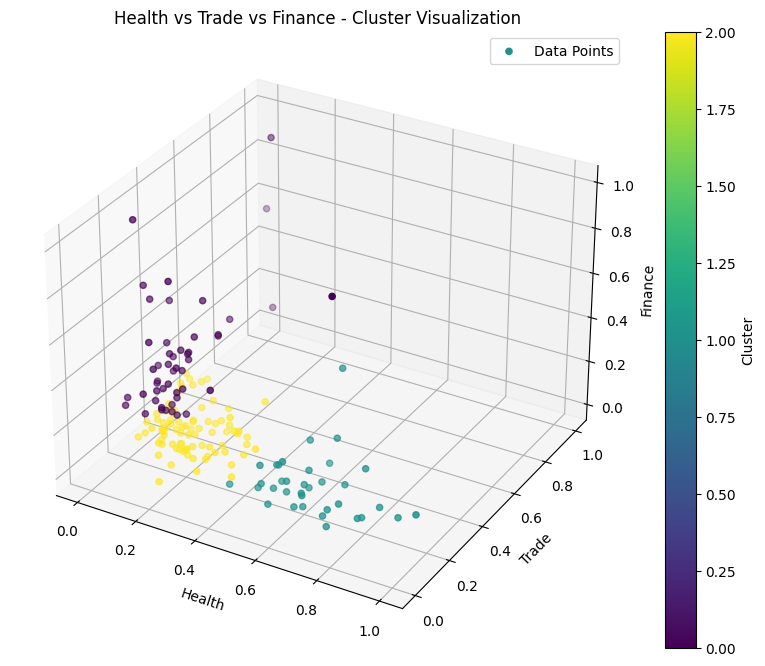

In [68]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

# Assuming 'df1' is your DataFrame with columns 'Health', 'Trade', 'Finance' and 'Class'

# Create a new figure
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Data points
x = np.array(df1['Health'])
y = np.array(df1['Trade'])
z = np.array(df1['Finance'])

# Color by 'Class'
colors = df1['Class']

# Scatter plot of data points with colors based on 'Class'
scatter = ax.scatter(x, y, z, c=colors, cmap='viridis', label='Data Points')

# Axis labels and title
ax.set_xlabel('Health')
ax.set_ylabel('Trade')
ax.set_zlabel('Finance')
ax.set_title('Health vs Trade vs Finance - Cluster Visualization')

# Add color bar
cbar = plt.colorbar(scatter)
cbar.set_label('Cluster')

# Legend
ax.legend()

plt.show()


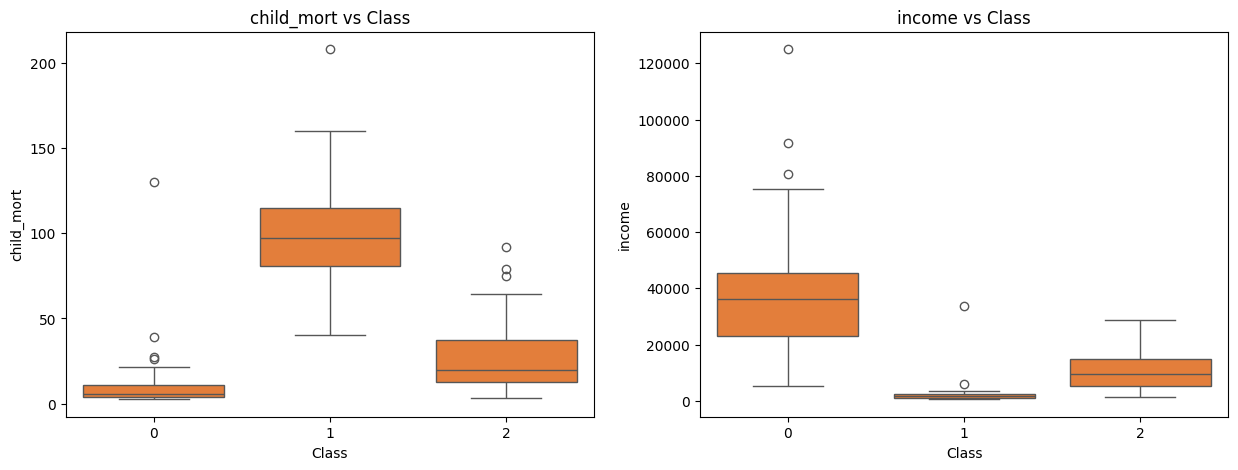

In [69]:
fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (15,5))

plt.subplot(1,2,1)
sns.boxplot(x = 'Class', y = 'child_mort', data  = data, color = '#FF781F');
plt.title('child_mort vs Class')

plt.subplot(1,2,2)
sns.boxplot(x = 'Class', y = 'income', data  = data, color = '#FF781F');
plt.title('income vs Class')

plt.show()

In [70]:
df1['Class'].loc[df1['Class'] == 0] = 'No Help Needed'
df1['Class'].loc[df1['Class'] == 1] = 'Help Needed'
df1['Class'].loc[df1['Class'] == 2] = 'Might Need Help'

fig = px.choropleth(df1[['Country','Class']],
                    locationmode = 'country names',
                    locations = 'Country',
                    title = 'Needed Help Per Country (World)',
                    color = df1['Class'],
                    color_discrete_map = {'Help Needed' : 'Red',
                                          'Might Need Help' : 'Yellow',
                                          'No Help Needed' : 'Green'})
fig.update_geos(fitbounds = "locations", visible = True)
fig.update_layout(legend_title_text = 'Labels',legend_title_side = 'top',title_pad_l = 260,title_y = 0.86)
fig.show(engine = 'kaleido')

PCA Data

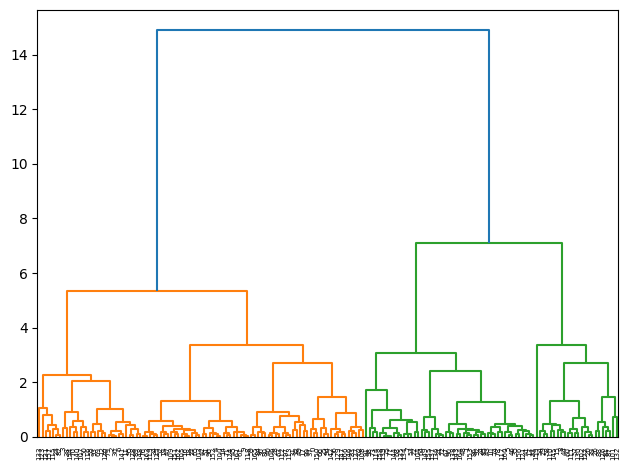

In [71]:
linkage_data = linkage(m2, method = 'ward', metric = 'euclidean')
dendrogram(linkage_data)
plt.tight_layout()
plt.show()

In this case, we need to divide the countries into 3 categories. That is why we will select a 3 clusters directly. Dendrogram analysis for this dataset is kind of redundant.
Here, again, we can see that 1 blue line alongwith 2 red lines are the penultimate clusters formed before connecting together.
It has 3 branches, thus indicating the 3 clusters that it creates before merging into 1!

In [72]:
from sklearn.cluster import AgglomerativeClustering
hierarchical_cluster = AgglomerativeClustering(n_clusters = 3, affinity = 'euclidean', linkage = 'ward')
labels = hierarchical_cluster.fit(m2)

pred_agc = pd.Series(hierarchical_cluster.labels_)
data['Class'] = pred_agc; pca_df2['Class'] = pred_agc

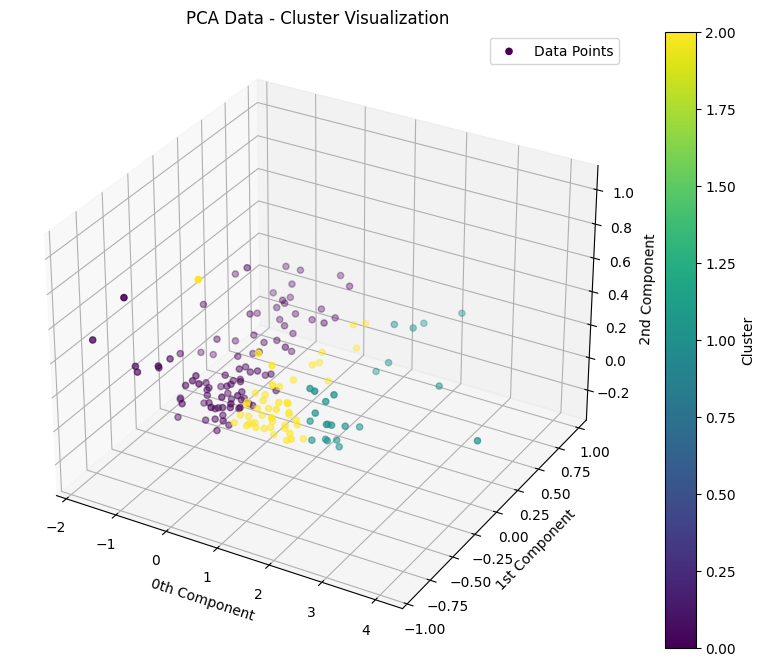

In [73]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

# Assuming 'pca_df2' is your DataFrame with PCA components and 'Class' column

# Create a new figure
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Data points
x = np.array(pca_df2[0])
y = np.array(pca_df2[1])
z = np.array(pca_df2[2])

# Color by 'Class'
colors = pca_df2['Class']

# Scatter plot of data points with colors based on 'Class'
scatter = ax.scatter(x, y, z, c=colors, cmap='viridis', label='Data Points')

# Axis labels and title
ax.set_xlabel('0th Component')
ax.set_ylabel('1st Component')
ax.set_zlabel('2nd Component')
ax.set_title('PCA Data - Cluster Visualization')

# Add color bar
cbar = plt.colorbar(scatter)
cbar.set_label('Cluster')

# Legend
ax.legend()

plt.show()

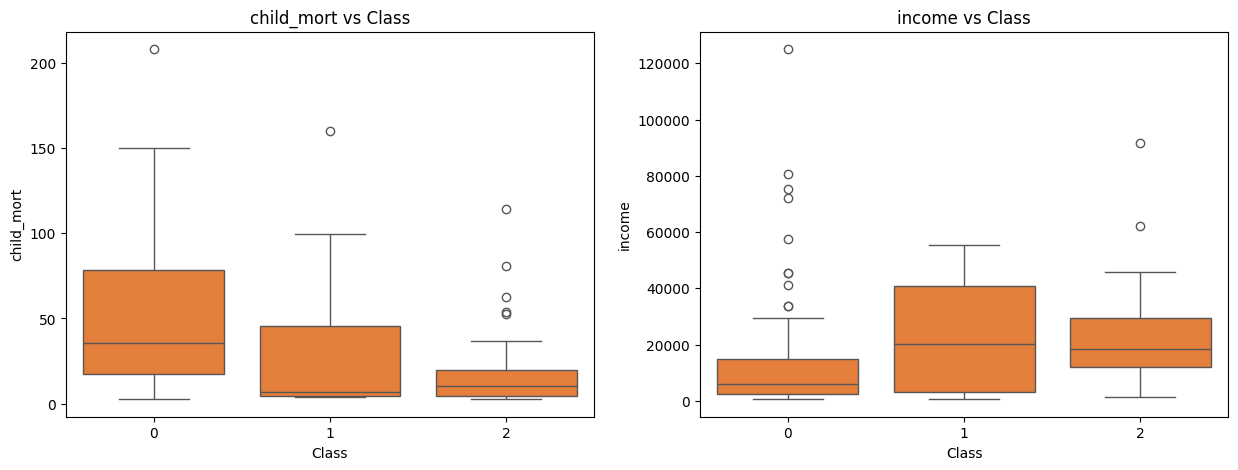

In [74]:
fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (15,5))

plt.subplot(1,2,1)
sns.boxplot(x = 'Class', y = 'child_mort', data  = data, color = '#FF781F');
plt.title('child_mort vs Class')

plt.subplot(1,2,2)
sns.boxplot(x = 'Class', y = 'income', data  = data, color = '#FF781F');
plt.title('income vs Class')

plt.show()

In [75]:
pca_df2['Class'].loc[pca_df2['Class'] == 0] = 'Help Needed'
pca_df2['Class'].loc[pca_df2['Class'] == 1] = 'Might Need Help'
pca_df2['Class'].loc[pca_df2['Class'] == 2] = 'No Help Needed'

fig = px.choropleth(pca_df2[['Country','Class']],
                    locationmode = 'country names',
                    locations = 'Country',
                    title = 'Needed Help Per Country (World)',
                    color = pca_df2['Class'],
                    color_discrete_map={'Help Needed':'Red',
                                        'Might Need Help':'Yellow',
                                        'No Help Needed':'Green'})
fig.update_geos(fitbounds = "locations", visible = True)
fig.update_layout(legend_title_text = 'Labels',legend_title_side = 'top',title_pad_l = 260,title_y = 0.86)
fig.show(engine = 'kaleido')

# <center><div style="font-family: Trebuchet MS; background-color: #FF781F; color: #2D2926; padding: 12px; line-height: 1;">Conclusion</div></center>


- The EDA portion of this dataset provides a summary of insights. The model's performance is significantly impacted by normalization and standardization.


- A key component is feature engineering. It is evident how sophisticated the procedures used to obtain feature combination and PCA data are. By highlighting the several possibilities available, these processes force us to select methods wisely based on the data and issue description.


- Fundamental differences exist between K-Means clustering, Hierarchical clustering, and DBSCAN clustering. Because they are founded on various ideas, the model performances differ. In general, the model's performances are not as impressive.   